<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

15. <b> Modeling of a multiperiod production and storage problem </b>
    - 15.1 Taïwan university instance ( Coursera chpt 2.8 )
    - 15.2 Mathematical modeling
    - 15.3 Python Pulp solution ( hard coded )
    - 15.4 Python Pulp solution ( compact model )
    - 15.5 Winston book / Indiana university instance : National steel corporation
    - 15.6 Mathematical modeling
    - 15.7 Python Pulp solution and book solution comparison
16. <b> Modeling of a multiperiod cash flow matching </b>
    - 16.1 Columbia university instance : Project funding 
    - 16.2 Mathematical modeling ( hard coded )
    - 16.3 Python Pulp solution and course solution comparison
    - 16.4 Mathematical modeling ( compact model  )
    - 16.5 Washington university instance : Finco Investment Corporation
    - 16.6 Mathematical modeling (Hard coded)
    - 16.7 Python Pulp solution and book solution comparison 
    - 16.8 Mathematical modeling ( compact model  )
    - 16.9 Lingo instance : Multi-period Financial Model
    - 16.10 Mathematical modeling (hard coded )
    - 16.11 Python Pulp Solution
    - 16.12 Mathematical modeling (compact model )
    - 16.13 Python Pulp Solution
17. <b>Modeling of a multiperiod work scheduling</b>
    - 17.1 Instance - Washington University - Wagner(1975) type of problem
    - 17.2 Mathematical modeling
    - 17.3 Python Pulp solution
18. <b>Modeling of an optimal employees time shift scheduling problem</b>
    - 18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".
    - 18.2 Mathematical modeling (Hard coded model)
    - 18.3 Python Pulp solution
    - 18.4 Mathematical modeling and solution (Compact model)
    - 18.5 Instance - Minimizing employees number by E. Mahalakshmi 1, S. Akila 2
    - 18.6 Mathematical modeling (Hard coded and compact model)
    - 18.7 Python Pulp solution
    - 18.8 Instance - Nurses day time shift problem (Stack overflow correction)
    - 18.9 Mathematical modeling (Hard coded and compact model)
    - 18.10 Python Pulp solution
    - 18.11 Instance - Nurses day time shift Excel problem
    - 18.12 Mathematical modeling (Hard coded and compact model)
    - 18.13 Python Pulp solution
19. <b>Modeling of a linear portfolio optimization / allocation problem</b>
    - 19.1 Instance by Kenneth A Barker
    - 19.2 Mathematical modeling
    - 19.3 Python Pulp solution
    - 19.4 Instance by Mastering python for finance p.96
    - 19.5 Mathematical modeling
    - 19.6 Python Pulp solution
    - 19.7 Instance 
    - 19.8 Mathematical modeling
    - 19.9 Python Pulp solution
    - 19.10 Instance by Andrew Hershy
    - 19.11 Mathematical modeling
    - 19.12 Python Pulp solution
20. <b>Modeling of a facility location problem</b>
    - 20.1 Instance - single facility location Weber problem (minimize distance)
    - 20.2 Mathematical modeling
    - 20.3 Solving using the SKLearn Kmeans centroids method
    - 20.4 Solving for multiples centroids
    - 20.5 Python Pulp solution
    - 20.6 Instance - Taïwan university minimum facility location (minimize amount of)
    - 20.7 Mathematical modeling
    - 20.8 Python Pulp solution 
    - 20.9 Instance minimum facility location  extension 1
    - 20.10 Instance minimum facility location  extension 2
    - 20.11 Chang Yaochen code analysis
    - 20.12 Instance - Fixed charge facility location cost minimization  (minimize amount of)
    - 20.13 Mathematical modeling (Compact model)
    - 20.14 Python Pulp solution 
    - 20.15 Instance - facility location picking and profit maximization  (minimize amount of)
    - 20.16 Mathematical modeling (Compact model)
    - 20.17 Python Pulp solution (Hard coded)

21. <b> Modeling of a single machine scheduling problem</b>
    - 21.1 Single machine, parallels ,flow shop and job shop differences.
    - 21.2 Instance
    - 21.3 Mathematical model - Sousa and Wolsey [1992]
    - 21.4 Handy solution try
    - 21.5 Itertools solution
    - 21.4 Pyomo solution
22. <b> Modeling of a parallels machines jobs costs assignment minimization</b>
    - 22.1 Instance
    - 22.2 Math model
    - 22.3 Python Pulp solution

22. <b> Modeling an uncapacited transport problem </b>
    - Abstract 
    - Mathematical modeling
    - Python Pulp or Cplex solution
23. <b> Modeling a fixed charges transport problem  </b>
    - 23.1 Instance -  modeling of a fixed charge transport optimization
    - 23.2 Mathematical modeling (Daskin (2003) Compact model)
    - 23.3 Python Pulp solution (Hard coded)
    - 23.4 Python Pulp solution (Compact model)
    - 23.5 Gurobi solution (Compact model)
    - 23.6 Instance - Cornell university capacited transport profit maximization
    - 23.7 Mathematical modeling (Compact model)
    - 23.8 Python Pulp solution (Hard coded)
    - 23.9 Python Pulp solution (Compact model)

24. <b> Modeling a bin packing problem  </b>
    - Abstract and differences between 1d and 2d
    - Mathematical modeling
    - Python Pulp or Cplex solution
25. <b> Modeling a traveling salesman problem  </b>
    - Abstract 
    - Instance
    - Mathematical modeling
    - Python Pulp or Cplex solution
26. <b> Modeling a vehicule routing problem  </b>
    - Abstract 
    - Instance
    - Mathematical modeling
    - Python Pulp or Cplex solution
27. <b> Modeling a shortest path problem  </b>
    - Abstract
    - Mathematical modeling
    - Python Pulp or Cplex solution
28. <b> Modeling a chemistry combinatorial optimization  </b>
    - Abstract of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
29. <b> Modeling a petroleum combinatorial optimization </b>
    - Abstract and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
30. <b> Modeling of a multiple objectives problem</b>
    - Abstract of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
31. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
32. <b> Getting familiar with variables relaxations</b>

33. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


33. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>15. Modeling of a multiperiod production and storage problem </b>

<div style="text-align:center">
<img src="img/TopCable.jpg" width="500"/>
</div>

## <b>15.1 Taïwan university Instance</b>

The manager predicts that we'll sell 100, 150, 200, and 170 on days 1, 2, 3, and 4 of the next week.

Production costs vary depending on the day of the week:
9th, 12th, 10th, and 12th on days 1, 2, 3, and 4 of the next week.

The storage cost is €1 per item stored, so if we keep it for 4 days, that's a cost of €4.

What is the best production plan to minimize costs and not have too much inventory?*

Link : https://www.coursera.org/learn/operations-research-modeling/lecture/vW447/2-8-simple-lp-formulation-production-and-inventory

## <b>15.2 Math model</b><br>
Hard coded model :<br>
<img src="img/01. Formulation du L.P.png"></img>




## <b>15.3 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Hard coded version :

In [266]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp

# -----------------------------------
# Type of problem
# -----------------------------------
problem = pulp.LpProblem("multiperiod_lp",pulp.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
# Items production per day 1,2,3,4
P1 = pulp.LpVariable('Prodution1', lowBound=0, cat='Integer')
P2 = pulp.LpVariable('Prodution2', lowBound=0, cat='Integer')
P3 = pulp.LpVariable('Prodution3', lowBound=0, cat='Integer')
P4 = pulp.LpVariable('Prodution4', lowBound=0, cat='Integer')


# Inventory per day 1,2,3,4
I1 = pulp.LpVariable('Inventory1', lowBound=0, cat='Integer')
I2 = pulp.LpVariable('Inventory2', lowBound=0, cat='Integer')
I3 = pulp.LpVariable('Inventory3', lowBound=0, cat='Integer')
I4 = pulp.LpVariable('Inventory4', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective function : minimizing production costs + inventory costs (1$ per item in inventory)
problem += (9*P1 + 12*P2 + 10*P3 + 12*P4) + (1*I1 + 1*I2 + 1*I3 + 1*I4) 

# Inventory balancing constraints
problem += P1 - 100 == I1
problem += I1 + P2 - 150 == I2
problem += I2 + P3 - 200 == I3
problem += I3 + P4 - 170 == I4

problem += P1 >= 0
problem += P2 >= 0 
problem += P3 >= 0 
problem += P4 >= 0 

# -----------------------------------
# Solution
# -----------------------------------
result = problem.solve()

# Printing solution
print("---First day---")
print("Production:" ,pulp.value(P1))
print("Inventory:" ,pulp.value(I1))


print("---2nd day---")
print("Production:" ,pulp.value(P2))
print("Inventory:" ,pulp.value(I2))

print("---3rd day---")
print("Production:" ,pulp.value(P3))
print("Inventory:" ,pulp.value(I3))

print("---4th day---")
print("Production:" ,pulp.value(P4))
print("Inventory:" ,pulp.value(I4))

print("Minimized production and storage cost = :" ,pulp.value(problem.objective))



---First day---
Production: 250.0
Inventory: 150.0
---2nd day---
Production: 0.0
Inventory: 0.0
---3rd day---
Production: 370.0
Inventory: 170.0
---4th day---
Production: 0.0
Inventory: 0.0
Minimized production and storage cost = : 6270.0


<b>Solution Explanation</b>

Our multi-period interval here is 4 days.

The solver calculates what needs to be produced and put into inventory in order to end up with no inventory on hand at the end of these 4 days, while still meeting demand.

On the first day, we produce 250 units, which meets the manager's forecast of selling 100 units on the first day, and we keep 150 units in inventory for the second day.

On the third day, we produce 370 units, still with the aim of meeting the manager's forecast for the following 2 days, and we keep 170 units in inventory.

On the fourth day, we have minimized our inventory and our carrying costs, and we have nothing left.



## <b>15.4 Compact model </b>

$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$

## <b>15.4 Python Pulp solution </b>


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [267]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_lp",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
# Define the production and storage costs for days 1, 2, 3, and 4; in quarters, it's the number of days, i.e., 4.
# Define production cost, inventory cost, and demand.
# Define the production costs per period, the inventory cost, and the demand reported by the sales department.
quaters = list(range(4))
c       =[9,12,10,12] # production cost
sc      =[1,1,1,1]
d       =[100,150,200,170]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]: # For all day from 2 to 4
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) # Not written the same as math model but it's still the same

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 150.0
quater_inventory__1 = 0.0
quater_inventory__2 = 170.0
quater_inventory__3 = 0.0
quater_prod__0 = 250.0
quater_prod__1 = 0.0
quater_prod__2 = 370.0
quater_prod__3 = 0.0
Minimized production and storage cost =   6270.0


## <b>15.5 Winston book / Indiana university instance  : National steel corporation</b>


<div style="text-align:center">
<img src="img/iStock-1151115902_scrap-metal.jpg" width="500"/>
</div>

National Steel Corporation (NSC) produces a special-purpose steel
used in the aircraft and aerospace industries. The sales department
has received orders for the next four months...

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf

Please notice: I am not responsible to leave this book part on the internet.




NSC can meet demand by producing steel, drawing on its
inventory, or a combination of these.Inventory at the start of
January is zero.Production costs are expected to increase in February and March.
Production and stock costs are:

<table>
  <tr>
    <th></th>
    <th>January</th>
     <th>February</th>
      <th>March</th>
       <th>April</th>
  </tr>
  <tr>
  <td>Production cost</td>
    <td>3000</td>
    <td>3300</td>
    <td>3600</td>
    <td>3600</td>
  </tr>
    <tr>
  <td>Inventory cost</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
  </tr>
</table>

Production costs are dollars per tonne. 
Inventory costs are in dollars per tonne and per month. 

For example, 1 ton in stock for 1 month costs 250 dollars;for 2
months it costs $ 500.

NSC can produce a maximum of 3,000 tonnes of steel per month. 
What production plan does it respond to demand at the minimum cost?

## <b>15.6 Maths model</b><br>
Compact model :
$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$


## <b>15.7 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [268]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_production_minimize_cost",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
quaters =   list(range(4))
c       =   [3000, 3300, 3600, 3600]
sc      =   [250, 250, 250, 250]
d       =   [2300, 2000, 3100, 3000]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]:
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) 

# Production-capacity constraints 
for i in quaters:
    model.addConstraint(x[i]<=3000)

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 700.0
quater_inventory__1 = 1700.0
quater_inventory__2 = 0.0
quater_inventory__3 = 0.0
quater_prod__0 = 3000.0
quater_prod__1 = 3000.0
quater_prod__2 = 1400.0
quater_prod__3 = 3000.0
Minimized production and storage cost =   35340000.0


We see that the python pulp solution is the same than the Winston book / Indiana university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
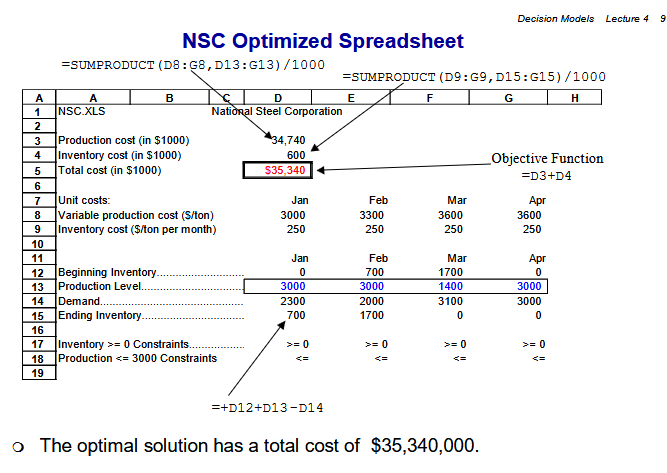

# <b> 16.  Modeling of a multiperiod cash flow matching </b>

<div style="text-align:center">
<img src="img/cfm.webp" width="500"/>
</div>

## <b>16.1 Columbia university Instance : Project funding problem</b>
<div style="text-align:center">
<img src="img/project-funding.png" >
</div>

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf



## <b>16.2 Math model ( Hard coded )</b><br>
$$
Min (C) = 1.04x{1} + 1.00x{2} + 0.98x{3} + 0.92x{4}
$$
$$
subject \thinspace to
$$
$$
 0.05x{1} + 0.04x{2} + x{3} >= 20 \thinspace (year \thinspace 2002)
$$
$$
 0.05x{1} + 1.04x{2} + x{4} >= 30 \thinspace (year \thinspace 2003) 
$$
$$
  1.05x{1}  >= 40 \thinspace (year \thinspace 2004)
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$



## <b>16.3 Python Pulp solution ( Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [269]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Xj = # of bond j to purchase today (in millions of bonds)
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement
problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

X1 = 38.095238
X2 = 0.0
X3 = 18.095238
X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


We see that the python pulp solution is the same than the Columbia university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>


Here is a screen cap :
<div style="text-align:center">
<img src="img/projectfund.png" >
</div>

Now, let's create the compact math model :

## <b>16.4 Mathematical modeling ( compact model  )</b><br>
Warning : here is my first attempt...<br>
$$
Min (C) = \sum_{j=1}^{4} initialBuy_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
\sum_{j=1}^{4} cf_{ij}.x_{j} >= cr_{z} \thinspace ∀ \thinspace z \in (1,...,3)  
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$
$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$
$$
 cf_{j} = bonds \thinspace cash \thinspace flow 
$$
$$
 cr_{z} = project \thinspace cash \thinspace requirement 
$$
$$
 initialBuy_{j} = Bonds \thinspace buying \thinspace price 
$$

<b>16.5 Python Pulp solution ( Compact model )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [270]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashflow_matching",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
X = ["X1","X2","X3","X4"] # Xj = # of bond j to purchase today (in millions of bonds)
initialBuy = [1.04,1.00,0.98,0.92] # initial_buy = price payed per bond
cf = [
      [0.05,0.04,1,0],
      [0.05,1.04,0,1],
      [1.05,0,0,0]] # cf = bonds cash flow
cr = [20,30,40] # cr = cash requirement per year

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('number_of_bounds', X ,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += lpSum([initialBuy[index]*x[j] for index,j in enumerate(x) ]) 

# --------- The precedent line recreates # problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement

for z,v in enumerate(cf): # recreating cf[i] # each cf line represents a year
    problem += lpSum([v[r] * x[j] for r,j in enumerate(x)  ] )  >= cr[z] # cr[z] = number of cr columns, z = index, there is one per year

# -------- The precedent line recreates : -------------
# problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
# problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
# problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# Reminder : the function index,value in enumerate(array) gives the index and the value of an array. 

# -----------------------------------
# Solution
# -----------------------------------
# print(problem) # Debug !
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

number_of_bounds_X1 = 38.095238
number_of_bounds_X2 = 0.0
number_of_bounds_X3 = 18.095238
number_of_bounds_X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


## <b>16.5 Washington university instance</b>

<div style="text-align:center">
<img src="img/diversify-your-bond-portfolio.jpg" width="500"/>
</div>


Finco Investment Corporation must determine investment strategy for the firm during the
next three years. 

Currently (time 0), 100,000 dollars is available for investment. Investments A,
B, C, D, and E are available. 

The cash flow associated with investing 1 dollar in each investment is given in Table 38.

For example, 1 dollar invested in investment B requires a $1 cash outflow at time 1 and re-
turns 50¢ at time 2 and 1 dollar at time 3. 

To ensure that the company’s portfolio is diversified,Finco requires that at most 75,000 dollars be placed in any single investment. 

In addition to investments A–E, Finco can earn interest at 8% per year by keeping uninvested cash in
money market funds. 

Returns from investments may be immediately reinvested. For example, the positive cash flow received from investment C at time 1 may immediately be reinvested in investment B. 

Finco cannot borrow funds, so the cash available for investment at any time is limited to cash on hand. 

Formulate an LP that will maximize cash on hand at time 3.

<div style="text-align:center">
<img src="img/finco.png" >
</div>



Link (Page 57 ): https://sites.math.washington.edu/~perkins/381AWin14/handouts/chapter3.pdf
and 
https://www.columbia.edu/~cs2035/courses/ieor3608.F02/finco.html

## <b>16.6 Math model (Hard coded)</b><br>
Comin' soon

## <b>16.7 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [271]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMaximize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Finco must decide how much money should be placed in each investment (including
# money market funds). Thus, we define the following decision variables:

# Dollars invested in investments 
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')
C = pulp.LpVariable('C', lowBound=0, cat='Integer')
D = pulp.LpVariable('D', lowBound=0, cat='Integer')
E = pulp.LpVariable('E', lowBound=0, cat='Integer')

# Dollars invested in in money market funds at time i
S0 = pulp.LpVariable('S0', lowBound=0, cat='Integer')
S1 = pulp.LpVariable('S1', lowBound=0, cat='Integer')
S2 = pulp.LpVariable('S2', lowBound=0, cat='Integer')


# -----------------------------------
# Math model
# -----------------------------------
# Finco wants to maximize cash on hand at time 3. At time 3, Finco’s cash on hand will be
# the sum of all cash inflows at time 3. From the description of investments A–E and the
# fact that from time 2 to time 3, S2 will increase to 1.08 * S2,

# Objective : maximize cash on hand at time 3
problem += B + 1.9 * D + 1.5 * E + 1.08 * S2

# Constraints
# investment starting point ( B and E are not available at time 0)
problem += A  + C + D + S0 == 100000

# Time 1
problem += 0.5 * A + 1.2 * C + 1.08 * S0 == B + S1

# Time 2
problem += A + 0.5 * B + 1.08 * S1 == E + S2

# Max invest
problem += A <= 75000
problem += B <= 75000
problem += C <= 75000
problem += D <= 75000
problem += E <= 75000

# Non negativity
problem +=  A >= 0
problem +=  B >= 0
problem +=  C >= 0
problem +=  D >= 0
problem +=  E >= 0
problem +=  S0 >= 0
problem +=  S1 >= 0
problem +=  S2 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Maximized portfolio at time 3 = ", value(problem.objective), " in $ millions")

# We find the optimal solution to be z = 218,500, A  = 60,000, B = 30,000, D  = 40,000,
# E = 75,000, C = S0 = S1 = S2 = 0. Thus, Finco should not invest in money market
# funds. At time 0, Finco should invest $60,000 in A and $40,000 in D. Then, at time 1, the
# $30,000 cash inflow from A should be invested in B. Finally, at time 2, the $60,000 cash
# inflow from A and the $15,000 cash inflow from B should be invested in E. At time 3,
# Finco’s $100,000 will have grown to $218,500

A = 60000.0
B = 30000.0
C = 0.0
D = 40000.0
E = 75000.0
S0 = 0.0
S1 = 0.0
S2 = 0.0
Maximized portfolio at time 3 =  218500.0  in $ millions


<b> 16.9 Lingo instance : Multi-period Financial Model </b>

Comin' soon, link : https://www.lindo.com/downloads/LINGO_text/9-Multi-period_Planning_Problems.pdf

# <b>17.Modeling of a multiperiod work scheduling</b>

<div style="text-align:center">
<img src="img/people.jpg" width="500"/>
</div>

## 17.1 Instance - Washington University - Wagner(1975) type of problem

CSL is a chain of computer service stores. The number of hours of skilled repair time that
CSL requires during the next five months is as follows:
- Month 1 (January): 6,000 hours
- Month 2 (February): 7,000 hours
- Month 3 (March): 8,000 hours
- Month 4 (April): 9,500 hours
- Month 5 (May): 11,000 hours

At the beginning of January, 50 skilled technicians work for CSL. Each skilled technician
can work up to 160 hours per month. To meet future demands, new technicians must be
trained. It takes one month to train a new technician. During the month of training, a
trainee must be supervised for 50 hours by an experienced technician. Each experienced
technician is paid 2,000 dollars a month (even if he or she does not work the full 160 hours).
During the month of training, a trainee is paid 1,000 dollars a month. At the end of each month,
5% of CSL’s experienced technicians quit to join Plum Computers. Formulate an LP
whose solution will enable CSL to minimize the labor cost incurred in meeting the ser-
vice requirements for the next ﬁve months.

Read more : 
https://sites.math.washington.edu//~perkins/381AWin14/handouts/chapter3.pdf


## 17.2 Math model (Hard coded )</b><br>
Comin' soon

## 17.3 Python Pulp solution (Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [272]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("multiperiod_work_scheduling",LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Xt = number of technicians trained during month t
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')
X5 = pulp.LpVariable('X5', lowBound=0, cat='Continuous')

# Yt = number of experienced technicians at the beginning of month t 
Y1 = pulp.LpVariable('Y1', lowBound=0, cat='Continuous')
Y2 = pulp.LpVariable('Y2', lowBound=0, cat='Continuous')
Y3 = pulp.LpVariable('Y3', lowBound=0, cat='Continuous')
Y4 = pulp.LpVariable('Y4', lowBound=0, cat='Continuous')
Y5 = pulp.LpVariable('Y5', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize Total labor = cost of paying trainees + cost of paying experienced technicians
problem += 1000 * X1 + 1000  * X2 + 1000 * X3 + 1000 * X4 +  1000 * X5 
+ 2000 * Y1 + 2000 * Y2 + 2000 * Y3  + 2000 * Y4 + 2000 * Y5

# Constraints

problem += 160 * Y1 - 50 * X1 >= 6000 
problem += 160 * Y2 - 50 * X2 >= 7000 
problem += 160 * Y3 - 50 * X3 >= 8000 
problem += 160 * Y4 - 50 * X4 >= 9500 
problem += 160 * Y5 - 50 * X5 >= 11000 

# What constraints does CSL face? Note that we are given Y1 > 50, and that for t { 1, 2,
# 3, 4, 5} CSL must ensure that
# Number of available technician hours during month t >= Number of technician hours required during month t 

# Because each trainee requires 50 hours of experienced technician time, and each skilled
# technician is available for 160 hours per month,
# Number of available technician hours during month t = 160yt - 50x

# As in the other multiperiod formulations, we need constraints that relate variables from
# different periods. In the CSL problem, it is important to realize that the number of skilled
# technicians available at the beginning of any month is determined by the number of skilled
# technicians available during the previous month and the number of technicians trained
# during the previous month:

# Experienced technicians available at beginning of month t =
# Experienced technicians available at beginning of month (t - 1)
# + technicians trained during month (t - 1)
# - experienced technicians who quit during month (t - 1) ( 5%)

# For example, for February, (73) yields
# Y2 = Y1 + X1 - 0.05Y1 or Y2 = 0.95Y1 + X1
problem +=  Y1 == 50
problem +=  0.95 * Y1 + X1 == Y2
problem +=  0.95 * Y2 + X2 == Y3
problem +=  0.95 * Y3 + X3 == Y4
problem +=  0.95 * Y4 + X4 == Y5

# Non negativity constraints
X1 >= 0
X2 >= 0
X3 >= 0
X4 >= 0
X5 >= 0
Y1 >= 0
Y2 >= 0
Y3 >= 0
Y4 >= 0
Y5 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

print('Statut:', LpStatus[problem.status])

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print(" Minimized cost of paying employees = ", value(problem.objective), " dollars ")

# In reality, the yt’s must be integers, so our solution is difficult to interpret. The problem with our formulation is that assuming that exactly 5% of the employees quit each
# month can cause the number of employees to change from an integer during one month
# to a fraction during the next month. We might want to assume that the number of employees quitting each month is the integer closest to 5% of the total workforce, but then
# we do not have a linear programming problem!

Statut: Optimal
X1 = 0.0
X2 = 8.4531681
X3 = 11.450138
X4 = 9.5180723
X5 = 0.0
Y1 = 50.0
Y2 = 47.5
Y3 = 53.578168
Y4 = 62.349398
Y5 = 68.75
 Minimized cost of paying employees =  29421.3784  dollars 


<b> 17.4 Mathematical modeling (compact model )</b><br>
Comin' soon

#  <b> 18.Modeling of an optimal employees time shift scheduling problem</b>

<div style="text-align:center">
<img src="img/employeesex.jpg" width="500"/>
</div>

## 18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".

Link : https://support.microsoft.com/en-us/office/using-solver-to-schedule-your-workforce-7ae8dd69-7582-4f41-83f1-ea3543398b46

Contoso bank processes checks 7 days a week. The number of workers needed each day to process checks is shown in row 14 of the Excel worksheet shown below. For example, 13 workers are needed on Tuesday, 15 workers are needed on Wednesday, and so on. All bank employees work 5 consecutive days. What is the minimum number of employees the bank can have and still meet its labor requirements?

<div style="text-align:center">
<img src="img/crosoft.png" width="800">
</div>

Needed employees:
- Monday: 17
- Tuesday: 13
- Wednesday: 15
- Thursday: 17
- Friday: 9
- Saturday: 9
- Sunday: 12

Constraint: Each employee works 5 days straight followed by 2 days off.
How many employees should be hired?


## 18.2 Math model (Hard coded)</b><br>

$$
Min (E) = x{0} + x{1} + x{2} + x{3} + x{4} + x{5} + x{6}
$$
$$
subject \thinspace to
$$
$$
 x{0} + x{3} + x{4} + x{5} + x{6} >= 17 
$$
$$
 x{0} + x{1} + x{4} + x{5} + x{6} >= 13 
$$

$$
 x{0} + x{1} + x{2} + x{5} + x{6} >= 15 
$$

$$
 x{0} + x{1} + x{2} + x{3} + x{4} >= 9 
$$
$$
 x{1} + x{2} + x{3} + x{4} + x{5} >= 9 
$$
$$
 x{2} + x{3} + x{4} + x{5} + x{6} >= 12 
$$

$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (0,...,6)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace employees \thinspace working \thinspace on \thinspace day \thinspace j
$$



## 18.3 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [273]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("minimize_staffing",p.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
days = list(range(7))
x = p.LpVariable.dicts('employee_starts_on_day', days,lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Define Objective
model += p.lpSum([x[i] for i in days])

# Define Constraints
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 17     # Monday
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 13     # Thuesday
model += x[0] + x[1] + x[2] + x[5] + x[6] >= 15     # Wesneday
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 17     # Thuesday
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 9      # Friday
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 9      # Saturday
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 12     # Sunday

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

print("Minimized number of employees = ", p.value(model.objective))

employee_starts_on_day_0 = 3.0
employee_starts_on_day_1 = 3.0
employee_starts_on_day_2 = 0.0
employee_starts_on_day_3 = 4.0
employee_starts_on_day_4 = 0.0
employee_starts_on_day_5 = 2.0
employee_starts_on_day_6 = 8.0
Minimized number of employees =  20.0


Analysis of the previous result.

I would like to know if on Monday, I will have 17 people present.
So, I go back on the 5 highest days in the week and made the sum

Day 6 either Sunday: 8.0 employees start to work + day 5 or Saturday: 2 employees start + day 4 or Friday: 0 employees start to work + day 3 or Thursday: 4 employees start to work
Total: 14 employees + 3 on the day 0 on Monday, so it's a good 17 people who work on Monday!

We see that the minimized needed employees python pulp solution is the same than the Microsoft Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/microsoft.png" >
</div>

## 18.4 Math model (Compact model)
Comin'soon


## 18.5 Instance - Minimizing employees number by E. Mahalakshmi 1, S. Akila 2

<div style="text-align:center">
<img src="img/minimizeemployees.png" width="500"/>
</div>

The table shows the minimum number of employees needed for each time slot; the goal is to minimize the number of employees needed.


Link : https://www.ijamtes.org/gallery/sp%20-%2033.pdf

## 18.6 Math model (Hard coded)

$$
Min (E) = x{0} + x{1} + x{2} + x{3} + x{4} + x{5} + x{6}
$$
$$
subject \thinspace to
$$
$$
 x{1} + x{2}  >= 50 
$$
$$
 x{2} + x{3} >= 100
$$

$$
 x{3} + x{4}  >= 150
$$

$$
 x{4} + x{5}  >= 64
$$
$$
 x{5} + x{6} >= 25
$$
$$
 x{6} + x{1} >= 36
$$


$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (0,...,6)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace employees 
$$

## 18.6 Python Pulp solution (Hard coded)
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [274]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("minimize_staffing",p.LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
n=6
time_slots = list(range(1, n+1)) # Starts at index 1, like in the math model

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('employee_starts_on_time_slot', time_slots,lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Define Objective
model += lpSum([x[i] for i in time_slots])

# Define Constraints
model += x[1] + x[2]  >= 50     # Shift 1
model += x[2] + x[3]  >= 100    # Shift 2
model += x[3] + x[4]  >= 150    # Shift 3
model += x[4] + x[5]  >= 64     # Shift 4 
model += x[5] + x[6]  >= 25     # Shift 5
model += x[6] + x[1]  >= 36     # Shift 6

# All variables are >= 0
for j in time_slots:
    model.addConstraint(x[j]>=0)
# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

print("Minimized number of employees = ", value(model.objective))

employee_starts_on_time_slot_1 = 11.0
employee_starts_on_time_slot_2 = 39.0
employee_starts_on_time_slot_3 = 61.0
employee_starts_on_time_slot_4 = 89.0
employee_starts_on_time_slot_5 = 0.0
employee_starts_on_time_slot_6 = 25.0
Minimized number of employees =  225.0


## <b>18.8 Instance - Nurses day time shift problem (Stack overflow correction)</b>

In this problem, a saloon owner wants to determine the schedule for staff members. The staff consists of the full-time shift of 9 hours and part-time shift of 3 hours. The saloon’s opening hours are divided into 4 shifts of 3

hours each. In each shift, different levels of demands are there that need the different number of staff members in each shift.

The required number of nurses for each shift is mentioned in the below table:


 <table>
  <tr>
    <th><b>Shift</b></th>
    <th>Morning</th>
    <th>Afternoon</th>
    <th>Evening</th>
    <th>Night</th>
  </tr>
  <tr>
    <td>Time period</td>
    <td>09 AM-12 PM</td>
    <td>12-03 PM </td>
    <td>03-06 PM </td>
    <td>06-09 PM </td>
  </tr>
  <tr>
    <td>Number of employees</td>
    <td>6</td>
    <td>11 </td>
    <td>8 </td>
    <td>6</td>
  </tr>
 
   
</table> 
There is at least 1 full-time employee we need in each shift.

The full-time employee will get 150
dollars for 9 hours shift and the part-time employee will get 45 dollars per shift.

Ged : '  In brief: We need only two full-time shifts, from 9 AM to 6 PM and from 12 PM to 9 PM. The variables are x0,x1'

## <b>18.9 Math model </b>
COmin' soon

## <b> 18.10 Python Pulp solution by StackOverflow Ged </b>


In [275]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("StaffSchedulingProblem", LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
shifts = list(range(4))

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('fulltimeshift_', shifts, lowBound=0, cat='Integer')
y = LpVariable.dicts('parttimeshift_', shifts, lowBound=0, cat='Integer')

# -----------------------------------
# Math model 
# -----------------------------------
# Objective
model += 150 * lpSum([x[i] for i in shifts]) + 45 * lpSum([y[i] for i in shifts])

# Define Constraints: For Employee starting the shift
model += x[0]+y[0]>=6
model += x[0]+x[1]+y[1]>=11
model += x[0]+x[1]+y[2]>=8
model += x[1]+y[3]>=6

# Define Constraints: At least full-time employee during any shift
model += x[0]>=1
model += x[1]>=1

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

# Print the variables optimized value
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Cost of Staff = ", value(model.objective))

fulltimeshift__0 = 1.0
fulltimeshift__1 = 1.0
fulltimeshift__2 = 0.0
fulltimeshift__3 = 0.0
parttimeshift__0 = 5.0
parttimeshift__1 = 9.0
parttimeshift__2 = 6.0
parttimeshift__3 = 5.0
Total Cost of Staff =  1425.0


# <b>19. Modeling of a linear portfolio optimization problem</b>

<div style="text-align:center">
<img src="img/multiprojets.png" width="500"/>
</div>

## <b>19.1 Instance by Kenneth A Barker "The newton corporation "</b>

As I can't copy the book, here is a table instance, please buy the book to read more.

 <table>
  <tr>
    <th><b>Project</b></th>
    <th>P1</th>
    <th>P2</th>
    <th>P3</th>
    <th>P4</th>
    <th>P5</th>
  </tr>
  <tr>
    <td>Profit(NPV)</td>
    <td>2.0</td>
    <td>3.6</td>
    <td>3.2</td>
    <td>1.6</td>
    <td>2.8</td>
  </tr>
  <tr>
    <td>Expenditure</td>
    <td>12</td>
    <td>24 </td>
    <td>20</td>
    <td>8</td>
    <td>16</td>
  </tr>
 
   
</table> 

The committee would like to maximize the total NPV from projects selected, subject to a 40
million limit on capital expenditures. This 40-million constraint makes it impossible to undertake all five projects; a subset of the five must be selected. 

## <b> 19.2 Mathematical modeling</b>
$$
Min (C) = \sum_{j=1}^{5} p_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
\sum_{j=1}^{5} e_{j}.x_{j} >= C  
$$

$$
x_{j} \in \{0,1\} ∀ \thinspace j \in (1,...,5)
$$

$$
where
$$

$$
 x_{j} = picked \thinspace project
$$
$$
 p_{j} = profit \thinspace per \thinspace project \thinspace j
$$
$$
 e_{j} = expenditure \thinspace per \thinspace project \thinspace j
$$
$$
 C = available \thinspace capital
$$



## <b> 19.3 Python Pulp solution</b>

In [276]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
# Decision variables are the choice of investment
X = ['P1', 'P2', 'P3', 'P4', 'P5']

# Inform the previsional profit by project (NPV)
p = {'P1': 2.0, 'P2': 3.6, 'P3': 3.2, 'P4': 1.6, 'P5': 2.8}

# Inform expenses per project
e = {'P1': 12, 'P2': 24, 'P3': 20, 'P4': 8, 'P5': 16}

# Available capital
C = 40

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('linear_portfolio_optimization',LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("project", X , lowBound=0, cat='Binary')
 
# -----------------------------------
# Math model
# -----------------------------------
# Objective
Problem += lpSum( [p[j] * x[j] for j in X])
 
# Constraints
Problem += lpSum([e[j] * x[j] for j in X ]) <= C,"Budget"

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
 
print('Status:', LpStatus[Problem.status])
print('MAXIMIZED PROFIT = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Picked Investment : ',i.name, '=', i.varValue)

Status: Optimal
MAXIMIZED PROFIT =  6.800000000000001
Picked Investment :  project_P1 = 1.0
Picked Investment :  project_P2 = 0.0
Picked Investment :  project_P3 = 1.0
Picked Investment :  project_P4 = 1.0
Picked Investment :  project_P5 = 0.0


We see that the  python pulp solution is the same than the Kenneth Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b>20. Modeling of a facility location problem</b>

## 20.1 Instance - Single Facility location Weber problem

A simple problem of location of the installations is the problem of Weber, in which only one installation must be placed, the only optimization criterion being the minimization of the weighted sum of distances from a given set of punctual sites.
<div style="text-align:center">
<img src="img/facility-location.png"></img>
</div>


## 20.2 Mathematical modeling

comin' soon


## 20.3 Solving using the SKLearn Kmeans centroids method


 My centroid coordinates :
[[42.63333333 43.2       ]]


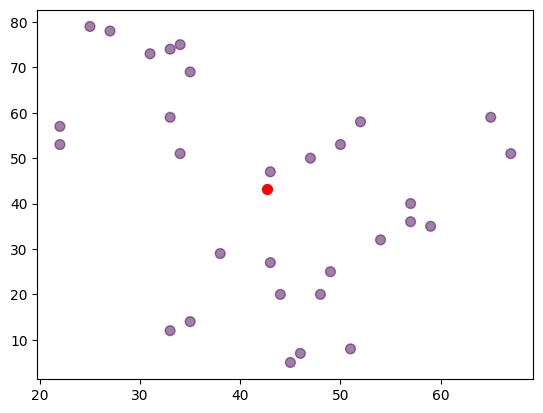

In [277]:
# -----------------------------------
# Import lib
# -----------------------------------
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# -----------------------------------
# Instance dataset
# -----------------------------------
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])

# -----------------------------------
# Kmeans
# -----------------------------------
kmeans = KMeans(n_clusters=1).fit(df)
centroids = kmeans.cluster_centers_
print(" My centroid coordinates :")
print(centroids) 

# -----------------------------------
# Plot
# -----------------------------------
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Now, I want 3 centroids, instead of one :

 My multiples centroids coordinates :
[[55.1 46.1]
 [43.2 16.7]
 [29.6 66.8]]


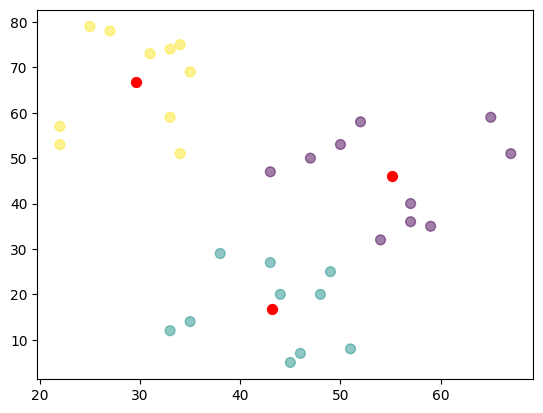

In [278]:
# -----------------------------------
# Kmeans
# -----------------------------------
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(" My multiples centroids coordinates :")
print(centroids) 

# -----------------------------------
# Plot
# -----------------------------------
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Ok, so now that I have used SkLearn, what if I want to use the pulp modeler instead ?

Edit: There is a code using Gurobi there : https://github.com/Jeevesh28/Facility-Location-Problem/blob/main/UFLP%20(with%20and%20without%20Disruptions).ipynb

and 

https://medium.com/operations-research-bit/solving-p-center-problem-using-pulp-and-python-db87b54a6711

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [279]:
# comin soon

# <b>20.6 Instance - Taïwan university minimum facility location </b>

Link : https://www.coursera.org/learn/operations-research-modeling/lecture/gAB39/3-5-facility-location-covering

I have 4 demands points, and 3 facility locations, the incidences are pictured below, how to minimize the number of facility locations ? (Hint, obviously, the facility location 1 is useless to cover all of the demands)
<table>
  <tr>
    <th><b>Demands (Circle)</b></th>
    <th>D1</th>
    <th>D2</th>
    <th>D3</th>
    <th>D4</th>

  </tr>
  <tr>
    <td>Locations (Square)</td>
    <td>L1</td>
    <td>L2</td>
    <td>L3</td>

  </tr>   
</table> 


<div style="text-align:center">
<img src="img/cfl.png"></img>
</div>


## 20.7 Math model

In chapter 10, I have used the wikipedia set cover maths model, but the one that is written without the incidence matrix (Read wikipedia), however, my python pulp code has an incidence matrix.:<br>
Source : [Wikipedia Set Cover](https://en.wikipedia.org/wiki/Set_cover_problem)

$$
Min (S) = \sum_{s ∈ S} x_{j}
$$
$$
s.t
$$
$$
 \sum_{s:e ∈ S} x_{j} >= 1 \thinspace ∀ \thinspace  e \in U
$$
$$
x_{j} \in \{0,1\} \thinspace ∀ \thinspace x_{j}  \in S
$$

$$
where
$$

$$
 x_{j} = set \thinspace selection
$$
$$
 e = element \thinspace of \thinspace the \thinspace U \thinspace set
$$
$$
 S = set \thinspace ensemble
$$
$$
 U = universe \thinspace of \thinspace elements
$$



Let's rewrite the Coursera math model and compare it to the wikipedia one that we already saw in chapter 10:

$$
Min  \sum_{j ∈ J} x_{j}
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j ∈ J} a_{ij}.x_{j} >= 1 \thinspace ∀ \thinspace  i \in I
$$
$$
x_{j} \in \{0,1\} \thinspace ∀ \thinspace j  \in J
$$

$$
where
$$

$$
 x_{j} = set \thinspace selection
$$
$$
 a_{ij} = incidence
$$
$$
 J = set \thinspace of \thinspace locations
$$
$$
 I = set \thinspace of \thinspace demands
$$
$$
 X = set \thinspace of \thinspace incidences
$$

I do notice that I the Coursera math model, the aij notation is used.

Now, let's focus on the coursera math model version, 
Let's describe the sets, according to the coursera course, now :

- I = {D1,D2,D3,D4}                -> set of demands<br>
- J = {L1,L2,L3}                      -> set of locations<br>
- matrix = {L1:(1,2),L2:(1,2,3),L3:(2,4)}  -> sets of incidences<br>



## 20.8 Python Pulp solution
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Ok, first, I'm using the wikipedia math model here, because it's the unweighted facility location version, and I will make sure solution is good by adding 2 extensions to the instance.

<b>I will consider each location as a "set" there, then, I will minimize the number of sets.</b>


In [280]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3
matrix = [  [1,1,0], # e1
            [1,1,1], # e2
            [0,1,0], # e3
            [0,0,1], # e4

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U ( Wikipedia math model)

# -----------------------------------
# Solution
# -----------------------------------
# print(Problem)

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  2.0
SELECTED SET-LOCATION: SET_S1 = 0.0
SELECTED SET-LOCATION: SET_S2 = 1.0
SELECTED SET-LOCATION: SET_S3 = 1.0


## 20.8 Minimum facility location extension 1

<div style="text-align:center">
<img src="img/cfl2.png"></img>
</div>

Here is the python pulp solution, It's ok. Squared Locations 1 and 3 are useless.

In [281]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3","S4"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3,S4
matrix = [  [1,1,0,0], # e1
            [1,1,1,0], # e2
            [0,1,0,0], # e3
            [1,0,1,1], # e4
            [0,0,0,1], # e5

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U ( Wikipedia math model)

# -----------------------------------
# Solution
# -----------------------------------
# print(Problem)

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  2.0
SELECTED SET-LOCATION: SET_S1 = 0.0
SELECTED SET-LOCATION: SET_S2 = 1.0
SELECTED SET-LOCATION: SET_S3 = 0.0
SELECTED SET-LOCATION: SET_S4 = 1.0


## 20.9 Minimum facility location extension 2

<div style="text-align:center">
<img src="img/cfl3.png"></img>
</div>

Here is the python pulp solution, It's ok, squared location 2 is useless, but you can't eliminate the others ones.

In [282]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3","S4"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3,S4
matrix = [  [1,1,0,0], # e1
            [1,1,1,0], # e2
            [0,0,1,0], # e3
            [1,0,1,1], # e4
            [0,0,0,1], # e5

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U present ( Wikipedia math model)


# -----------------------------------
# Solution
# -----------------------------------

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  3.0
SELECTED SET-LOCATION: SET_S1 = 1.0
SELECTED SET-LOCATION: SET_S2 = 0.0
SELECTED SET-LOCATION: SET_S3 = 1.0
SELECTED SET-LOCATION: SET_S4 = 1.0


# <b> 20.12 Instance - fixed charge facility location </b>


<div style="text-align:center">
<img src="img/1622201040316.jpg" width="600">
</div>

- We have 3 suppliers and 5 customers.
- We have customer demand: 80, 270, 250, 160, 180.
- We have the suppliers fixed installation costs and their maximum capacity.
- We have the transportation costs to each customer.

How to minimize the facility locations amount and transportations and fixed costs, subject to fullfill customers demands ?

<div style="text-align:center">
<img src="img/capafacilocation.png" width="">
</div>


## <b> 20.13 Math model </b>

I first take a look at the wikipedia math model :
https://en.wikipedia.org/wiki/Optimal_facility_location


$$
Min \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij}.d_{j}.y_{ij} + \sum_{i=1}^{n} f_{i}.x_{i}
$$
$$
subject \thinspace to 
$$
$$
 \sum_{i=1}^{n} y_{ij} = 1 \thinspace ∀ \thinspace  j = 1....m
$$
$$
 \sum_{j=1}^{m} d_{j}.y{ij} <= u_{i}.x_{i} \thinspace ∀ \thinspace  i = 1....n
$$
$$
y_{ij} >= 0 \thinspace ∀ \thinspace i  = 1....n \thinspace and \thinspace j  = 1....m
$$
$$
x_{i} \in \{0,1\} \thinspace ∀ \thinspace i  = 1....n
$$

$$
where
$$

$$
 x_{i} = Facility \thinspace i \thinspace is \thinspace open  
$$
$$
 y_{ij} =  amount \thinspace of \thinspace the \thinspace demand \thinspace  d_{j} filled \thinspace by \thinspace facility \thinspace i 
$$
$$
 d_{j} =  demand \thinspace per \thinspace customer \thinspace j 
$$
$$
 f_{i} =  fixed \thinspace cost \thinspace of \thinspace opening \thinspace facility \thinspace i 
$$
$$
 c_{ij} =   cost \thinspace to \thinspace ship \thinspace a \thinspace product \thinspace from \thinspace facility \thinspace i to \thinspace customer \thinspace j 
$$
$$
 u_{i} =   capacity \thinspace of \thinspace facility \thinspace i 
$$
$$
 n =   facility \thinspace to \thinspace open
$$
$$
 m =   number \thinspace of \thinspace customers
$$
$$
 customers =   set \thinspace of \thinspace \thinspace m \thinspace customers
$$
$$
 facilities =   set \thinspace of \thinspace n \thinspace facilities
$$


I see that it's also similar to the Cornell university mentioned one : 
https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem

## <b>20.14 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

First, I am using this code I've found on the net, for testing purpose, variables names does not match the math model, so I will add another version , just below, matching the wikipedia math model, to make sure everything is ok, then I will use the code on another known instance result, to check if result is good too.

In [283]:
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
Customer = [1,2,3,4,5]
Facility = ['Fac-1', 'Fac-2', 'Fac-3']
Demand = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180}
Max_Supply = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500} 
fixed_cost = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 }
transportation_cost = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10},
                       'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
                       'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
                      }

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Capacitated_Facility_Location_Problem", LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
# We define the objective function: minimize the sum of the fixed costs and variable costs (transport costs)
prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

# Constraints

# We must meet customer demand
for i in Customer:
    prob += lpSum(ser_customer[(i,j)] for j in Facility) == Demand[i]

# We cannot exceed the capacity of suppliers
for j in Facility:
    prob += lpSum(ser_customer[(i,j)] for i in Customer) <= Max_Supply[j]*use_facility[j]

# 
for i in Customer:
    for j in Facility:
        prob += ser_customer[(i,j)] <= Demand[i]*use_facility[j]


# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

print("Solution Status = ", LpStatus[prob.status])
# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Create facility at place = ", j)

# Priting continuous variables
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)


# Minimized total cost
print("Cost = ", value(prob.objective))

Solution Status =  Optimal
Create facility at place =  Fac-2
Create facility at place =  Fac-3
Service_(1,_'Fac_2') = 80.0
Service_(2,_'Fac_2') = 270.0
Service_(3,_'Fac_2') = 150.0
Service_(3,_'Fac_3') = 100.0
Service_(4,_'Fac_3') = 160.0
Service_(5,_'Fac_3') = 180.0
Use_Facility_Fac_2 = 1.0
Use_Facility_Fac_3 = 1.0
Cost =  5610.0


Hey ! It appears that the Pulp code I've found <b>does not match the wikipedia math model</b>. 

In fact, the fixed charge capacity location 
math model of the python pulp code I've found is this one : 

https://scipbook.readthedocs.io/en/latest/flp.html

$$
 \sum_{j=1}^m f_j y_j +\sum_{i=1}^n \sum_{j=1}^m c_{ij} x_{ij}
 $$
$$
Subject \thinspace to
$$
$$ 
\sum_{j=1}^m x_{ij} =d_i  \thinspace  for \thinspace i=1,\cdots,n 
$$
$$
\sum_{i=1}^n x_{ij} \leq u_j y_j \thinspace for \thinspace j=1,\cdots,m  
$$
$$
x_{ij} \leq d_i y_j   \thinspace            for \thinspace i=1,\cdots,n; j=1,\cdots,m 
$$

$$
x_{ij} \geq 0      \thinspace              for \thinspace i=1,\cdots,n; j=1,\cdots,m 

$$

$$
y_j \in \{ 0,1 \}     \thinspace            for \thinspace j=1,\cdots,m

$$

$$
where
$$

$$
 y_{j} = Facility \thinspace i \thinspace is \thinspace established \thinspace  at \thinspace  location \thinspace  j
$$
$$
 x_{ij} =  amount \thinspace serviced \thinspace from \thinspace facility \thinspace j \thinspace to \thinspace demand \thinspace point \thinspace i
$$
$$
 d_{i} =  demand \thinspace per \thinspace customer \thinspace i
$$
$$
 f_{j} =  fixed \thinspace cost \thinspace of \thinspace opening \thinspace facility \thinspace j 
$$
$$
 c_{ij} =   cost \thinspace to \thinspace ship \thinspace a \thinspace product \thinspace from \thinspace facility \thinspace i \thinspace to \thinspace customer \thinspace j 
$$
$$
 u_{j} =   capacity \thinspace of \thinspace facility \thinspace i 
$$
$$
 n =   set \thinspace of \thinspace \thinspace n \thinspace customers \thinspace i
$$
$$
 m =   set \thinspace of \thinspace m \thinspace facilities  \thinspace j
$$

## <b>20.14 Python Pulp solution using the scip math model !</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

I am now exactly matching the math model variables names to the python pulp code, It does exactly match, except c[j][i] in the objective function, the rest is the same.

Edit : I will rewrite another versions using nested arrays, I find it clearer to read.

In [284]:
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
n = [1,2,3,4,5] # customers set
m = ['Fac-1', 'Fac-2', 'Fac-3'] # facilities set
d = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180} # customers demands
u = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500}  # facility capacities (Mj in the scip math model)
f = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 } # fixed costs of opening facility
c = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10}, # cost of shipping
     'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
     'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
    }

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Capacitated_Facility_Location_Problem", LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
y = LpVariable.dicts("Use Facility", m, 0, 1, LpBinary) # Using a facility or not (0-1 type decisions variables)
x = LpVariable.dicts("Amount", [(i,j) for i in n for j in m], 0) # Linking facility to customers, all possibilities

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += lpSum(f[j]*y[j] for j in m) + lpSum(c[j][i]*x[(i,j)] for j in m for i in n)

# Constraints

# We must meet customer demand
for i in n:
    prob += lpSum(x[(i,j)] for j in m) == d[i] # means link amount from facility to customer has to be = to the customer demand

# We cannot exceed the capacity of facilities
for j in m:
    prob += lpSum(x[(i,j)] for i in n) <= u[j]*y[j] # means link from facility to customer has to be <= to any opened facility capacity

#  Third constraints provide variable upper bounds; even though they are redundant, they yield a much tighter linear programming relaxation than the equivalent, weaker formulation without them, as will be discussed in the next section.
for i in n:
    for j in m:
        prob += x[(i,j)] <= d[i]*y[j] # means link amount from facility to customer has to be <= to the customer demand


# -----------------------------------
# Solution
# -----------------------------------
# print(prob)
prob.solve()

print("Solution Status = ", LpStatus[prob.status])
# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Create facility at place = ", j)

# Priting continuous variables
for v in prob.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)


# Minimized total cost
print("Cost = ", value(prob.objective))

Solution Status =  Optimal
Create facility at place =  Fac-2
Create facility at place =  Fac-3
Amount_(1,_'Fac_2') = 80.0
Amount_(2,_'Fac_2') = 270.0
Amount_(3,_'Fac_2') = 150.0
Amount_(3,_'Fac_3') = 100.0
Amount_(4,_'Fac_3') = 160.0
Amount_(5,_'Fac_3') = 180.0
Use_Facility_Fac_2 = 1.0
Use_Facility_Fac_3 = 1.0
Cost =  5610.0


We see that the  python pulp solution is the same than the Scip https://scipbook.readthedocs.io/en/latest/flp.html one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/fixedchargelocation.png" >
</div>

Using the math model and the proven code result, we can now easily go from one to another and clearly step up my level.
This is rarely found on the internet.

# <b> 20.15 Instance - facility location picking and profit maximization</b>

<div style="text-align:center">
<img src="img/facilityintro.jpg" width="600" >
</div>

Suppose a paper products manufacturer has enough capital to build and manage an additional manufacturing plant in the United States in order to meet increased demand in three cities: New York City, NY, Los Angeles, CA, and Topeka, KS. The company already has distribution facilities in Denver, CO, Seattle, WA, and St. Louis, MO, and due to limited capital, cannot build an additional distribution facility. So, they must choose to build their new plant in one of these three locations. Due to geographic constraints, plants in Denver, Seattle, and St. Louis would have a maximum operating capacity of 400 tons/day, 700 tons/day, and 600 tons/day, respectively. The cost of transporting the products from the plant to the city is directly proportional, and an outline of the supply, demand, and cost of transportation is shown in the figure below. Regardless of where the plant is built, the selling price of the product is $100/ton. 

Read more : https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem



<div style="text-align:center">
<img src="img/cornellfl.png" >
</div>

## <b> 23.2 Maths model (Compact model)</b>
Cornell University Instance (No fixed costs)
<div style="text-align:center">
<img src="img/capacited transport1.png" >
</div>
<div style="text-align:center">
<img src="img/capacitedtransport2.png" >
</div>



## <b> 23.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Please notice that they say that the math model need to be executed on 3 factories, to pick the most advantageous one, well, ok, let's do it 

Let :
- Set of factories : {F1,F2,F3}
- Set of customers : {C1,C2,C3}

Thus, <b>xij</b> becomes an <b>association</b> of one factory x and one customer j , for exemple F1C1, and becomes <b>a decision variable</b>, this is what I mean by "hard coding" the optimization.


<b> Executing their math model for the Denver factory :</b>

In [285]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F1C1 = pulp.LpVariable('F1C1', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 1 expressed in tons
F1C2 = pulp.LpVariable('F1C2', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 2 expressed in tons
F1C3 = pulp.LpVariable('F1C3', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 3 expressed in tons

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F1C1 * (100 - 10) + F1C2 * (100 - 5) + F1C3 * (100 - 17) 

# Constraints

# Max operating by factory
prob += F1C1 + F1C2 + F1C3 <= 400

# Max demand per customers
prob += F1C1  <= 300
prob += F1C2  <= 100
prob += F1C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  36500.0
Tons sent: F1C1 = 300.0
Tons sent: F1C2 = 100.0
Tons sent: F1C3 = 0.0


<b>Seattle factory</b>

In [286]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F2C1 = pulp.LpVariable('F2C1', lowBound=0, cat='Integer')
F2C2 = pulp.LpVariable('F2C2', lowBound=0, cat='Integer')
F2C3 = pulp.LpVariable('F2C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob +=  F2C1 * (100 - 11) + F2C2 * (100 - 18) + F2C3 * (100 - 28) 

# Constraints

# Max operating by factory
prob += F2C1 + F2C2 + F2C3 <= 700

# Max demand per customers
prob += F2C1 <= 300
prob += F2C2 <= 100
prob += F2C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  56500.0
Tons sent: F2C1 = 300.0
Tons sent: F2C2 = 100.0
Tons sent: F2C3 = 300.0


<b> Saint Louis factory</b>

In [287]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F3C1 = pulp.LpVariable('F3C1', lowBound=0, cat='Integer')
F3C2 = pulp.LpVariable('F3C2', lowBound=0, cat='Integer')
F3C3 = pulp.LpVariable('F3C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F3C1 * (100 - 18 ) + F3C2 * (100 - 3) + F3C3 * (100 - 9)

# Constraints

# Max operating by factory
prob += F3C1 + F3C2 + F3C3 <= 600

# Max demand per customers
prob += F3C1 <= 300
prob += F3C2 <= 100
prob += F3C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  55200.0
Tons sent: F3C1 = 0.0
Tons sent: F3C2 = 100.0
Tons sent: F3C3 = 500.0


We see that the python pulp solution is the same than the Cornell university Gams one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :

<div style="text-align:center">
<img src="img/pickingfactory.png" >
</div>

# Comin soon : new case

Please wait, I am reviewing this case that I've found on the internet.

In [288]:
from pulp import *

TYPES = ["warehouse","factory"] #i
CITIES = ["bolu","sivas"] #j

p = {"warehouse":{"bolu":1,"sivas":2},"factory":{"bolu":3,"sivas":2}}
c = {"warehouse":{"bolu":5,"sivas":2},"factory":{"bolu":6,"sivas":3}}

model = LpProblem("Profit_Maximization",LpMaximize)

X = LpVariable.dicts("",[(i,j) for i in TYPES for j in CITIES],0, 1, cat = "Binary")

model += lpSum(lpSum([[X[(i,j)]*p[i][j] for j in CITIES] for i in TYPES]))

model += lpSum([X[("warehouse",j)] for j in CITIES])<=1

model += lpSum(lpSum([[c[i][j]*X[(i,j)] for j in CITIES] for i in TYPES])) <= 10
               
for j in CITIES:

    model += X[("factory",j)] >= X[("warehouse",j)]

# print(model)
status = model.solve()
# status = LpStatus[status]

print("weight for opening a wirehouse in bolu,sivas and opening a factory in bolu,sivas given below respectively.")
print([X[(i,j)]for i in TYPES for j in CITIES], [X[(i,j)].varValue for i in TYPES for j in CITIES])
print("PROFIT: ", value(model.objective),"Million")
# print(status)

print('Minimized number of sets (locations) = ', value(model.objective))
 
for i in model.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

weight for opening a wirehouse in bolu,sivas and opening a factory in bolu,sivas given below respectively.
[_('warehouse',_'bolu'), _('warehouse',_'sivas'), _('factory',_'bolu'), _('factory',_'sivas')] [0.0, 0.0, 1.0, 1.0]
PROFIT:  5.0 Million
Minimized number of sets (locations) =  5.0
SELECTED SET-LOCATION: _('factory',_'bolu') = 1.0
SELECTED SET-LOCATION: _('factory',_'sivas') = 1.0
SELECTED SET-LOCATION: _('warehouse',_'bolu') = 0.0
SELECTED SET-LOCATION: _('warehouse',_'sivas') = 0.0


#  <b> 21. Modeling of a single machine scheduling problem</b>

# <b>21.1 Single machine, parallels ,flow shop and job shop differences.</b>

- Single Machine:

<div style="text-align:center">
<img src="img/ordonnancement/Machine_unique_Ordonnant.JPEG">
</div>

- Parrallels machines:

<div style="text-align:center">
<img src="img/ordonnancement/Machine_Parallèles_Ordonnancement.JPEG">
</div>

- Unique path workshop (Flow Shop):

<div style="text-align:center">
<img src="img/ordonnancement/Flow_Shop_Ordonnancement.JPEG">
</div>

- Multiple route workshops (Job Shop):

<div style="text-align:center">
<img src="img/ordonnancement/Job_Shop_Ordonnancement.JPEG">
</div>

Major Cplex github link :
https://github.com/ErayCakici



## <b> 21.2 Single Machine scheduling instance</b>

<div style="text-align:center">
<img src="img/singlemachine.jpg" width="500">
</div>

- I have 1 machine and 3 jobs to do on it. (Single <b>disjunctive</b> resource)
- The jobs last 2 and 5 and 6 hours respectively.
- The jobs must be delivered at 3:00 PM, 9:00 AM, and 11:00 AM, respectively.
How can I avoid being late? 

<table align="center">
  <tr>
    <th><b>Job</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
  </tr>
   <tr>
    <th><b>Duration</b></th>
    <th>2</th>
    <th>5</th>
    <th>6</th> 
  </tr>
  <tr>
    <th><b>Due date</b></th>
    <th>3:00 PM</th>
    <th>9:00 AM</th>
    <th>11:00 AM</th>   
</tr>
</table> 

Link : https://en.wikipedia.org/wiki/Single-machine_scheduling 
Chapter :  Minimizing the cost of lateness

## <b> 21.3 Math model</b>

- Good Introduction made by ROADEF  EDP Sciences, ROADEF, SMAI 2010:<br>
A single machine scheduling problem (SMSP) consists of a set V of n jobs to
be sequenced on a single disjunctive resource. The interval [rj , dj ] defines the
execution window of each job j, where rj is the release date of j and dj , its due-
date. The processing time pj of j is known and preemption is not allowed. A
feasible job sequence has to be found so that, sj being the starting time of job j,
sj ≥ rj and sj + pj ≤ dj .

<b>How to find a sequence that minimizes the maximum lateness ?</b>


PLease wait I will erase this next model, It has no due dates.

Integer linear Math model Sousa and Wolsey [1992]  :
https://pure.tue.nl/ws/portalfiles/portal/1961310/428838.pdf

Please wait....copying it..
$$
 Min \sum_{j=1}^n  \sum_{t=1}^{T-pj+1}  c_{jt} . x_{jt}
 $$
$$
Subject \thinspace to
$$
$$ 
\sum_{t=1}^{T-pj+1} x_{jt} = 1   \thinspace  for \thinspace j=1,\cdots,n 
$$
$$
 \sum_{j=1}^n \sum_{s=t-pj+1}^{t} x_{js} <= 1  \thinspace for \thinspace t=1,\cdots,T  
$$


$$
x_jt \in \{ 0,1 \}     \thinspace   (j = 1, ... , n; t = 1, ... , T - Pj + 1)

$$

$$
where
$$

$$
 x_{jt} = 
$$



## <b> 21.4 Handy try out</b>

Here is a first try by hand : Unfortunatly, job 3 is late and only delivered at 13:00 P.M instead of 11:00 A.M
<table>
  <tr>
    <th><b>Hours</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
  </tr>
   <tr>
    <th><b>Job 1</b></th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
  <tr>
    <th><b>Job 2</b></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
    <tr>
    <th><b>Job 3</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>

  </tr>
 
   
</table> 

This second try out is ok , Job 1 gets delivered before 3:00 PM, Job 2 gets delivered before 9:00 AM, and Job 3 gets delivered before 11:00 AM: 
<table>
  <tr>
    <th><b>Hours</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
  </tr>
   <tr>
    <th><b>Job 1</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
   
  </tr>
  <tr>
    <th><b>Job 2</b></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
    <tr>
    <th><b>Job 3</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>

  </tr>
 
   
</table>


## <b> 21.5 Itertools solution</b>

crédit : Tim Roberts - StackOverflow

In [289]:

import itertools

# We inform the name of each task, its duration, and its time due.
tasks = [("job1", 2, 15), ("job2", 5, 9), ("job3", 6,11)]

# For each permutation
for tasklist in itertools.permutations(tasks):
    time = 1
    start = []
    order = []
    for task in tasklist:
        start.append( time )
        order.append( task )
        time += task[1]
        if time-1 > task[2]:
            # We violated a due date constraint.
            break
    else:
        print("Order to apply",order,"success")

Order to apply [('job2', 5, 9), ('job3', 6, 11), ('job1', 2, 15)] success


## <b> 21.6 Pyomo solution</b>


I am trying out his code : 
https://jckantor.github.io/ND-Pyomo-Cookbook/notebooks/04.02-Machine-Bottleneck.html

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 0.0
  Upper bound: 0.0
  Number of objectives: 1
  Number of constraints: 21
  Number of variables: 15
  Number of nonzeros: 3
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.01
  Wallclock time: 0.01
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subpro

{'Makespan': 13.0,
 'Max Pastdue': 0,
 'Sum of Pastdue': 0,
 'Number Pastdue': 0,
 'Number on Time': 3,
 'Fraction on Time': 1.0}

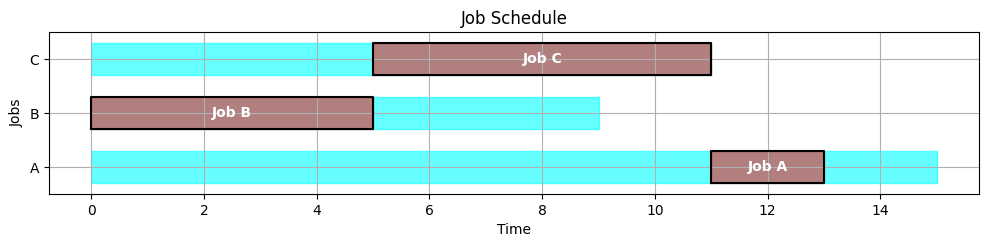

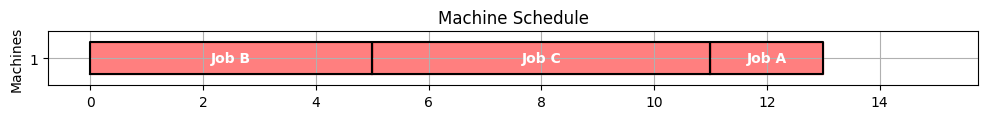

In [290]:
# -----------------------------------
# Import
# -----------------------------------
import matplotlib.pyplot as plt
from IPython.display import display
import pandas as pd
import shutil
import sys
import os.path
from pyomo.environ import *
from pyomo.gdp import *

# -----------------------------------
# Instance
# -----------------------------------
JOBS = {
    'A': {'release': 0, 'duration': 2, 'due': 15},
    'B': {'release': 0, 'duration': 5, 'due': 9},
    'C': {'release': 0, 'duration': 6, 'due': 11}
}

# -----------------------------------
# Single machine scheduling
# -----------------------------------
def opt_schedule(JOBS):

    # create model
    m = ConcreteModel()
    
    # index set to simplify notation
    m.J = Set(initialize=JOBS.keys())
    m.PAIRS = Set(initialize = m.J * m.J, dimen=2, filter=lambda m, j, k : j < k)

    # upper bounds on how long it would take to process all jobs
    tmax = max([JOBS[j]['release'] for j in m.J]) + sum([JOBS[j]['duration'] for j in m.J])

    # decision variables
    m.start      = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.pastdue    = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    m.early      = Var(m.J, domain=NonNegativeReals, bounds=(0, tmax))
    
    # additional decision variables for use in the objecive
    m.makespan   = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.maxpastdue = Var(domain=NonNegativeReals, bounds=(0, tmax))
    m.ispastdue  = Var(m.J, domain=Binary)

    # objective function
    m.OBJ = Objective(expr = sum([m.pastdue[j] for j in m.J]), sense = minimize)

    # constraints
    m.c1 = Constraint(m.J, rule=lambda m, j: m.start[j] >= JOBS[j]['release'])
    m.c2 = Constraint(m.J, rule=lambda m, j: 
            m.start[j] + JOBS[j]['duration'] + m.early[j] == JOBS[j]['due'] + m.pastdue[j])
    m.c3 = Disjunction(m.PAIRS, rule=lambda m, j, k:
        [m.start[j] + JOBS[j]['duration'] <= m.start[k], 
         m.start[k] + JOBS[k]['duration'] <= m.start[j]])    
    
    m.c4 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= m.maxpastdue)
    m.c5 = Constraint(m.J, rule=lambda m, j: m.start[j] + JOBS[j]['duration'] <= m.makespan)
    m.c6 = Constraint(m.J, rule=lambda m, j: m.pastdue[j] <= tmax*m.ispastdue[j])
    
    TransformationFactory('gdp.hull').apply_to(m)
    SolverFactory('cbc').solve(m).write()
    
    SCHEDULE = {}
    for j in m.J:
        SCHEDULE[j] = {'machine': 1, 'start': m.start[j](), 'finish': m.start[j]() + JOBS[j]['duration']}
        
    return SCHEDULE

# -----------------------------------
# Tracing gantt
# -----------------------------------
def gantt(JOBS, SCHEDULE={}):
    bw = 0.3
    plt.figure(figsize=(12, 0.7*(len(JOBS.keys()))))
    idx = 0
    for j in sorted(JOBS.keys()):
        x = JOBS[j]['release']
        y = JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='cyan', alpha=0.6)
        if j in SCHEDULE.keys():
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        idx += 1

    plt.ylim(-0.5, idx-0.5)
    plt.title('Job Schedule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)), JOBS.keys())
    plt.grid()
    xlim = plt.xlim()
    
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                SCHEDULE[j]['machine'] = 1
        MACHINES = sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))

        plt.figure(figsize=(12, 0.7*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            idx = MACHINES.index(SCHEDULE[j]['machine'])
            x = SCHEDULE[j]['start']
            y = SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw], color='red', alpha=0.5)
            plt.plot([x,y,y,x,x], [idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start'] + SCHEDULE[j]['finish'])/2.0,idx,
                'Job ' + j, color='white', weight='bold',
                horizontalalignment='center', verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5, len(MACHINES)-0.5)
        plt.title('Machine Schedule')
        plt.yticks(range(len(MACHINES)), MACHINES)
        plt.ylabel('Machines')
        plt.grid()

# -----------------------------------
# Display KPIs
# -----------------------------------
def kpi(JOBS, SCHEDULE):
    KPI = {}
    KPI['Makespan'] = max(SCHEDULE[job]['finish'] for job in SCHEDULE)
    KPI['Max Pastdue'] = max(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Sum of Pastdue'] = sum(max(0, SCHEDULE[job]['finish'] - JOBS[job]['due']) for job in SCHEDULE)
    KPI['Number Pastdue'] = sum(SCHEDULE[job]['finish'] > JOBS[job]['due'] for job in SCHEDULE)
    KPI['Number on Time'] = sum(SCHEDULE[job]['finish'] <= JOBS[job]['due'] for job in SCHEDULE)
    KPI['Fraction on Time'] = KPI['Number on Time']/len(SCHEDULE)
    return KPI

SCHEDULE = opt_schedule(JOBS)
gantt(JOBS, SCHEDULE)
kpi(JOBS, SCHEDULE)

## <b>21.7 Hodgson-Moore algorithm </b>

Minimize the number of late jobs( Throughput)

In [291]:
# Comin' soon

# <b> 21.8 Python Pulp solution </b>
link : 
https://github.com/ayigitdogan/Single-Machine-Scheduling-with-PuLP/blob/main/Report%20-%20Single%20Machine%20Scheduling%20with%20PuLP.pdf


#  <b> 22. Modeling of a parallels machines jobs costs assignment minimization</b>

<div style="text-align:center">
<img src="img/parallelsmachinery.png" width="500">
</div>

## <b>22.1 Instance</b>
This instance is derived from Introduction to operations research hillier.pdf, page 387, please buy the book to know more..
<table>
<tr>
    <th>Product</th>
    <td>1</td>
    <td>2</td>
    <td>3</td>
    <td>4</td>

  </tr>
  <tr>
    <th>Cost on Machine 1</th>
    <td>41</td>
    <td>27</td>
    <td>28</td>
    <td>24</td>

  </tr>
  <tr>
    <th>Cost on Machine 2</th>
       <td>41</td>
    <td>27</td>
    <td>28</td>
    <td>24</td>

  </tr> 
   <tr>
    <th>Cost on Machine 3</th>
       <td>41</td>
    <td>27</td>
    <td>28</td>
    <td>24</td>

  </tr> 
  <tr>
    <th>Minimum amount</th>
       <td>20</td>
    <td>30</td>
    <td>30</td>
    <td>40</td>

  </tr> 


</table> 

## <b>22.2 Math model</b>
Comin' soon

## <b>22.3 Python Pulp solution</b>
Comin' soon



# <b>23. Modeling an uncapacited transport problem </b>

## <b>23.1 Instance</b>

In this first example, we minimize only the total distance and we ask Pulp to select 5 roads , and to minimize the total distance between factories and stores, we use binary decision variables. Solution is obvious, looking at the drawing :
<div style="text-align:center">
<img src="img/uncapacited2.jpg"></img>
</div>

## <b>23.2 Math model</b>

Considering an <b>xij</b> notation, i is being the factory, j being a store.
Then, xij is an association of both.
Let 
- F = set of factories {A,B}
- S = set of stores {1,2,3,4,5}
- d = distance matrix

Then, for example, xB3 becomes a decision variable , it will hold the best value as possible, calculated by the solver. Otherly said x , indiced by the i and j association of indices becomes a <b>decision veriable</b>.

Let's now build the math model :

$$
Min  \sum_{i ∈ F} \sum_{j ∈ C} d_{ij}.x_{ij} 
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j ∈ C} x_{ij} >= maxRoads \thinspace ∀ \thinspace i  \in F
$$
$$
x_{ij} \in \{0,1\} ∀ \thinspace i \in F and \thinspace  ∀ \thinspace j \in S
$$

$$
where
$$

$$
 x_{ij} = association \thinspace between \thinspace a \thinspace i \thinspace factory \thinspace and \thinspace a \thinspace j \thinspace store
$$
$$
 d_{ij} = distance \thinspace between \thinspace a \thinspace i \thinspace factory \thinspace and \thinspace a \thinspace j \thinspace store
$$
$$
 F = set \thinspace of \thinspace factories
$$
$$
 C = set \thinspace of \thinspace stores
$$
$$
 d = distance \thinspace matrix
$$



## <b> 23.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [292]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
XA1 = LpVariable('XA1', lowBound=0, cat='Binary') # Road from factory A to store 1
XA2 = LpVariable('XA2', lowBound=0, cat='Binary')
XA3 = LpVariable('XA3', lowBound=0, cat='Binary')
XA4 = LpVariable('XA4', lowBound=0, cat='Binary')
XA5 = LpVariable('XA5', lowBound=0, cat='Binary')
XB1 = LpVariable('XB1', lowBound=0, cat='Binary')
XB2 = LpVariable('XB2', lowBound=0, cat='Binary')
XB3 = LpVariable('XB3', lowBound=0, cat='Binary')
XB4 = LpVariable('XB4', lowBound=0, cat='Binary')
XB5 = LpVariable('XB5', lowBound=0, cat='Binary')
 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('transport_optimization',LpMinimize)
 
# -----------------------------------
# Maths model
# -----------------------------------

# Objective
Problem += 3*XA1 + 1*XA2 + 3*XA3 + 2*XA4 + 9*XA5 + 25*XB1 + 15*XB2 + 32*XB3 + 22*XB4 + 8*XB5
 
# Constraints
# We want at least 5 routes to the 5 stores.
Problem += (XA1 + XA2 + XA3 + XA4 + XA5 + XB1 + XB2 + XB3 + XB4 + XB5) >= 5
 
# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
print('Statut:', LpStatus[Problem.status])
print('Total minimized distance = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

Statut: Optimal
Total minimized distance =  17.0
Picked road : XA1 = 1.0
Picked road : XA2 = 1.0
Picked road : XA3 = 1.0
Picked road : XA4 = 1.0
Picked road : XB5 = 1.0


## <b> 23.4 Python pulp solution (Compact solution  )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [293]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
F = [A,B]
S = [1,2,3,4,5]
d = [ 
    [3,1,3,2,9],
    [25,15,32,22,8]
]
maxRoads = 5

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('transport_optimization',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------

 # Create a list of all possibilities, the goal is to recreate each xij possibilities, faster than typing it by hand
routes = [(f, s) for f in F  for s in S]

# Create decisions variables list, each xij possibilities
x = LpVariable.dicts("Route", (F , S), 0, None, LpBinary)

# Create a distance directory
d = makeDict([F,S], d, 0)

# -----------------------------------
# Maths model
# -----------------------------------
# Objective function
Problem += lpSum([d[i][j]  * x[i][j]  for (i, j) in routes]) # Looks like the math model

# Constraints
Problem += lpSum([x[i][j]  for (i, j) in routes]) >= maxRoads # Looks like the math model

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
print('Statut:', LpStatus[Problem.status])
print('Total minimized distance = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

Statut: Optimal
Total minimized distance =  17.0
Picked road : Route_A_1 = 1.0
Picked road : Route_A_2 = 1.0
Picked road : Route_A_3 = 1.0
Picked road : Route_A_4 = 1.0
Picked road : Route_B_5 = 1.0


# <b> 24. Instance -  modeling of a fixed charge transport optimization</b>

## <b>24.1 Instance</b>
I have 2 factories A and B which build the same object, their production capacity is 1000 and 4000,

I have 5 stores, which have a request of 500,900,1800,200,700.Total demand is therefore 4100.

The cost of each road from a factory to a store is:

In [294]:
# Stores        1  2  3  4  5
# Costs         2, 4, 5, 2, 1  # A   Factories
# Costs         3, 1, 3, 2, 3  # B

<div style="text-align:center">
<img src="img/transport2.png">
</div>

What deliveries to minimize the overall transport cost?

## <b> 24.2 Math model</b>
<img src="img/transport_mdl.png"></img>


## <b> 24.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [295]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
XA1 = LpVariable('XA1', lowBound=0, cat='Integer') # From factory A to store 1
XA2 = LpVariable('XA2', lowBound=0, cat='Integer')
XA3 = LpVariable('XA3', lowBound=0, cat='Integer')
XA4 = LpVariable('XA4', lowBound=0, cat='Integer')
XA5 = LpVariable('XA5', lowBound=0, cat='Integer')
XB1 = LpVariable('XB1', lowBound=0, cat='Integer')
XB2 = LpVariable('XB2', lowBound=0, cat='Integer')
XB3 = LpVariable('XB3', lowBound=0, cat='Integer')
XB4 = LpVariable('XB4', lowBound=0, cat='Integer')
XB5 = LpVariable('XB5', lowBound=0, cat='Integer')
 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# -----------------------------------
# Math model
# -----------------------------------
# The objective function is to minimize the overall transport cost, taking into account each road.
Problem += 2*XA1 + 4*XA2 + 5*XA3 + 2*XA4 + 1*XA5 + 3*XB1 + 1*XB2 + 3*XB3 + 2*XB4 + 3*XB5
 
# Constraints

# Supply
# Factory A capacity
Problem += XA1 + XA2 + XA3 + XA4 + XA5 <= 1000
# Factory B capacity
Problem += XB1 + XB2 + XB3 + XB4 + XB5 <= 4000

# Demand
# Store demand 1 
Problem += XA1 + XB1 >= 500
# Store demand 2
Problem += XA2 + XB2 >= 900
# Store demand 3
Problem += XA3 + XB3 >= 1800
# Store demand 4
Problem += XA4 + XB4 >= 200
# Store demand 5
Problem += XA5 + XB5 >= 700

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized total cost = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked route :',i.name, '=', i.varValue)

Statut: Optimal
Minimized total cost =  8600.0
Picked route : XA1 = 300.0
Picked route : XA5 = 700.0
Picked route : XB1 = 200.0
Picked route : XB2 = 900.0
Picked route : XB3 = 1800.0
Picked route : XB4 = 200.0


## <b> 24.4 Python pulp solution (Compact model)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Now, I am rewriting the pulp code, strictly like in the Daskin math model.

In [296]:
from pulp import *

# -----------------------------------
# Instance , strictly written like in the DASKIN math model
# -----------------------------------

# Factories
I = ["A", "B"]

# Supply
S = {"A": 1000, "B": 4000}

# Stores
J = ["1", "2", "3", "4", "5"]

# Demand
D = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
}

# Road Costs
cost_matrix = [  
# Store   # 1  2  3  4  5
        [2, 4, 5, 2, 1],  # A   Factories
        [3, 1, 3, 2, 3],  # B
     ]

# -----------------------------------
# Type of problem
# -----------------------------------
# We want to minimize the overall transport cost, we create our problem
prob = LpProblem("Distribution_Problem", LpMinimize)


# -----------------------------------
# Decision variables
# -----------------------------------
  
# We transform costs into a dictionary - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
c = makeDict([I, J], cost_matrix, 0)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(i, j) for i in I for j in J]

# A dictionary called 'x' is created to contain the referenced variables(the routes)
x = LpVariable.dicts("Route", (I, J), 0, None, LpInteger)

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
prob += (lpSum([c[i][j] * x[i][j] for (i, j) in Routes]),"transport_cost_sum",) # Like the Daskin math model

# The capacity maximum constraints are added to prob for each capacity node
for i in I:
    prob += (lpSum([x[i][j] for j in J]) <= S[i])

# The demand minimum constraints are added to prob for each demand node 
for j in J:
    prob += (lpSum([x[i][j] for i in I]) >= D[j])

# -----------------------------------
# Solution
# -----------------------------------

prob.solve()
print ("Status:",LpStatus [prob.status])
for i in prob.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

# The optimised objective function value is printed to the screen
print ("Total minimized cost : ", value (prob.objective))


Status: Optimal
Picked road : Route_A_1 = 300.0
Picked road : Route_A_5 = 700.0
Picked road : Route_B_1 = 200.0
Picked road : Route_B_2 = 900.0
Picked road : Route_B_3 = 1800.0
Picked road : Route_B_4 = 200.0
Total minimized cost :  8600.0


## <b> 24.5 Gurobi solution (Compact model)</b>


<div style="text-align:center">
<img src="img/GurobiLogo.jpg" width="100">
</div>


I see that the Gurobi solution is the same than the Pulp one.

In [297]:
import gurobipy as gp
from gurobipy import GRB
try:

# -----------------------------------
# Instance 
# -----------------------------------
    factories = ['A','B']

    stores = ['1','2','3','4','5']

    cost = {
        ('A','1'): 2,
        ('A','2'): 4,
        ('A','3'): 5,
        ('A','4'): 2,
        ('A','5'): 1,
        ('B','1'): 3,
        ('B','2'): 1,
        ('B','3'): 3,
        ('B','4'): 2,
        ('B','5'): 3
    }

    supply = {
        ('A'): 1000,
        ('B'): 4000
    }

    demand = {
        ('1'): 500,
        ('2'): 900,
        ('3'): 1800,
        ('4'): 200,
        ('5'): 700,

    }

# -----------------------------------
# Type of problem
# -----------------------------------
    m = gp.Model("transport_problem_1")

# -----------------------------------
# Decision variables
# -----------------------------------
    # Create variables
    flow = {}
    for f in factories:
        for s in stores:
            flow[f,s] = m.addVar(obj=cost[f,s], name='flow_%s_%s' % (f, s))

    # Integrate new variables
    m.update()

# -----------------------------------
# Math model
# -----------------------------------
    # Add supply constraints
    for f in factories:
        m.addConstr(gp.quicksum(flow[f,s] for s in stores) <= supply[f], 'supply_%s' % (f))
    
    # Add demand constraints
    for s in stores:
        m.addConstr(gp.quicksum(flow[f,s] for f in factories) >= demand[s], 'demand_%s' % (s))

# -----------------------------------
# SOlution 
# -----------------------------------

    # Optimize the model. The default ModelSense is to is to minimize the objective, which is what we want.
    m.optimize()

    # Print solution
    if m.status == GRB.status.OPTIMAL:
        print ('\nOptimal flows :')
        for f in factories:
            for s in stores:
                print (f, '->', s, ':', flow[f,s].x)

except gp.GurobiError:
    print ('Error reported')

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (22621.2))

CPU model: AMD Ryzen 3 5300U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x39505a07
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 4e+03]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4000000e+03   2.875000e+02   0.000000e+00      0s
       6    8.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective  8.600000000e+03

Optimal flows :
A -> 1 : 300.0
A -> 2 : 0.0
A -> 3 : 0.0
A -> 4 : 0.0
A -> 5 : 700.0
B -> 1 : 200.0
B -> 2 : 900.0
B -> 3

## <b> 24.6 Cplex solution</b>

<div style="text-align:center">
<img src="img/IBM_CPLEX_0.png">
</div>

In [298]:
import cplex
from docplex.mp.model import Model

# -----------------------------------
# Instance 
# -----------------------------------
capacities = {1: 1000, 2: 4000}
demands = {3: 500, 4: 900, 5: 1800, 6:200,7:700}
costs = {(1,3): 2, (1,4):4, (1,5):5, (1,6):2,(1,7):1,
         (2,3): 3, (2,4):1, (2,5):3, (2,6):2,(2,7):3,
         }

# Python ranges will be used to iterate on source, target nodes.
source = range(1, 3) # {1, 2}
target = range(3, 8) # {3,4,5,6,7}

# -----------------------------------
# Type of problem
# -----------------------------------
tm = Model(name='transportation')

# -----------------------------------
# Decisions variables 
# -----------------------------------
# create flow variables for each couple of nodes
# x(i,j) is the flow going out of node i to node j
x = {(i,j): tm.continuous_var(name='x_{0}_{1}'.format(i,j)) for i in source for j in target}

# -----------------------------------
# Math model
# -----------------------------------

# Objective
# each arc comes with a cost. Minimize all costed flows
tm.minimize(tm.sum(x[i,j]*costs.get((i,j), 0) for i in source for j in target))
tm.print_information()

# Constraints
# for each node, total outgoing flow must be smaller than available quantity
for i in source:
    tm.add_constraint(tm.sum(x[i,j] for j in target) <= capacities[i])
    
# for each target node, total ingoing flow must be greater thand demand
for j in target:
    tm.add_constraint(tm.sum(x[i,j] for i in source) >= demands[j])

# -----------------------------------
# Solution
# -----------------------------------
tms = tm.solve()
# assert tms
tms.display()

Model: transportation
 - number of variables: 10
   - binary=0, integer=0, continuous=10
 - number of constraints: 0
   - linear=0
 - parameters: defaults
 - objective: minimize
 - problem type is: LP
solution for: transportation
objective: 8600.000
status: OPTIMAL_SOLUTION(2)
x_1_3 = 300.000
x_1_7 = 700.000
x_2_3 = 200.000
x_2_4 = 900.000
x_2_5 = 1800.000
x_2_6 = 200.000


# <b> 24.5 Instance - Cornell university capacited transport profit maximization</b>

Suppose a paper products manufacturer has enough capital to build and manage an additional manufacturing plant in the United States in order to meet increased demand in three cities: New York City, NY, Los Angeles, CA, and Topeka, KS. The company already has distribution facilities in Denver, CO, Seattle, WA, and St. Louis, MO, and due to limited capital, cannot build an additional distribution facility. So, they must choose to build their new plant in one of these three locations. Due to geographic constraints, plants in Denver, Seattle, and St. Louis would have a maximum operating capacity of 400 tons/day, 700 tons/day, and 600 tons/day, respectively. The cost of transporting the products from the plant to the city is directly proportional, and an outline of the supply, demand, and cost of transportation is shown in the figure below. Regardless of where the plant is built, the selling price of the product is $100/ton. 

Read more : https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem

## <b> 24.6 Maths model (Compact model)</b>
Cornell University Instance (No fixed costs)
<div style="text-align:center">
<img src="img/capacited transport1.png" >
</div>
<div style="text-align:center">
<img src="img/capacitedtransport2.png" >
</div>



## <b> 24.7 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

For a better understanding, I will hard code the math model, then, I will code the compact model just after to show the difference.

- Set of factories : {F1,F2,F3}
- Set of customers : {C1,C2,C3}

Thus, <b>xij</b> becomes an <b>association</b> of one factory x and one customer j , for exemple F1C1, and becomes <b>a decision variable</b>.

This model will pick the best routes, considering routes costs, for maximizing profits, It won't pick a factory, otherwize, I need to restart it 3 times, like what they say in the Cornell paper. But their math model is cool.

## <b>23.4 Python Pulp solution ( hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [299]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F1C1 = pulp.LpVariable('F1C1', lowBound=0, cat='Integer') # Amount sent from Factory 1 to Customer 1 expressed in tons
F1C2 = pulp.LpVariable('F1C2', lowBound=0, cat='Integer') # Amount sent from Factory 1 to Customer 2 expressed in tons
F1C3 = pulp.LpVariable('F1C3', lowBound=0, cat='Integer')
F2C1 = pulp.LpVariable('F2C1', lowBound=0, cat='Integer')
F2C2 = pulp.LpVariable('F2C2', lowBound=0, cat='Integer')
F2C3 = pulp.LpVariable('F2C3', lowBound=0, cat='Integer')
F3C1 = pulp.LpVariable('F3C1', lowBound=0, cat='Integer')
F3C2 = pulp.LpVariable('F3C2', lowBound=0, cat='Integer')
F3C3 = pulp.LpVariable('F3C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F1C1 * (100 - 10) + F1C2 * (100 - 5) + F1C3 * (100 - 17) + F2C1 * (100 - 11) + F2C2 * (100 - 18) + F2C3 * (100 - 28) + F3C1 * (100 - 18 ) + F3C2 * (100 - 3) + F3C3 * (100 - 9)

# Constraints

# Max operating by factory
prob += F1C1 + F1C2 + F1C3 <= 400
prob += F2C1 + F2C2 + F2C3 <= 700
prob += F3C1 + F3C2 + F3C3 <= 600

# Max demand per customers
prob += F1C1 + F2C1 + F3C1 <= 300
prob += F1C2 + F2C2 + F3C2 <= 100
prob += F1C3 + F2C3 + F3C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  82200.0
Tons sent: F1C1 = 300.0
Tons sent: F1C2 = 0.0
Tons sent: F1C3 = 0.0
Tons sent: F2C1 = 0.0
Tons sent: F2C2 = 0.0
Tons sent: F2C3 = 0.0
Tons sent: F3C1 = 0.0
Tons sent: F3C2 = 100.0
Tons sent: F3C3 = 500.0


## <b>24.8 Python Pulp solution ( Compact model )</b>

Now, I rewrite the same code than in chapter 23.4, but, strictly recreating the math model names and nomenclature.


In [300]:
# comin' soon

# <b> 25 Modeling of a bin packing problem  </b>

<div style="text-align:center">
<img src="img/binpack.jpg" width="500"/>
</div>

## <b> 25.1 Abstract and differences between 1d and 2d</b>

- 1 dimensional bin packing (1d): taking weight into account
- 2 dimensional bin packing (2d): taking width and length into account

## <b> 25.2 1d Instance</b>
 <table>
  <tr>
    <th><b>Item</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>

  </tr>
  <tr>
    <td><b>Weight</b></td>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>32</th>
    <th>2</th>
    <th>32</th>
    <th>5</th>
    <th>7</th>
    <th>9</th>
    <th>12</th>
    <th>11</th>
    <th>1</th>
    <th>2</th>
  </tr>
</table> 
<br>
 <table>
  <tr>
    <th><b>Max bins</b></th>
    <th>32</th>
  </tr>
  <tr>
    <td><b>Bin capacity</b></td>
    <th>32</th>
  </tr>
</table>


  - How to minimize the <b>amount of used bins</b>, subject to their <b>max weight capacity</b> ?

## <b> 25.3 Math model</b>

First, I take a look a the wikipedia Math model :<br>
https://en.wikipedia.org/wiki/Bin_packing_problem

$$
Min \thinspace K =  \sum_{j=1}^{n} y_{j} 
$$
$$
subject \thinspace to 
$$
$$
 K >= 1 
$$
$$
\sum_{j=1}^{n} s(i).x_{ij} <= B.y_{j} ∀ \thinspace j \in n
$$
$$
\sum_{j=1}^{n} x_{ij} = 1 ∀ \thinspace i \in I
$$
$$
y_{j} \in \{0,1\} ∀ \thinspace j \in n
$$
$$
x_{ij} \in \{0,1\} ∀ \thinspace i \in I \thinspace ∀  \thinspace j \in n
$$

$$
where
$$

$$
 y_{j} = bin \thinspace j \thinspace being \thinspace used \thinspace or \thinspace not 
$$
$$
 x_{ij} = item \thinspace i \thinspace is \thinspace placed \thinspace in \thinspace the \thinspace j \thinspace bin   
$$

$$
 I = set \thinspace of \thinspace items
$$
$$
 B = j \thinspace bin \thinspace capacity 
$$
$$
 K = number \thinspace of \thinspace used \thinspace bins
$$
$$
 n = number \thinspace of \thinspace available \thinspace bins
$$


Note: for now, I do not know what s(i) is ... Let's search for another bin packing model to compare them.


## <b> 25.4 Python pulp solution </b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Here is a bin packing code, found on the internet, my goal will next to make it stricly match the wikipedia math model, for a better understanding, using the same variables names and indentation, in the next part. Why that ? Because I need to be able to move from one ( the math model) to the other ( the python pulp code), and it's suppose to become "easy" to do that. Well, let's first try it as this : 

In [301]:

from pulp import *
import time

# -----------------------------------
# Instance 
# -----------------------------------

items = [("1", 5),
         ("2", 6),
         ("3", 7),
         ("4", 32),
         ("5", 2),
         ("6", 32),
         ("7", 5),
         ("8", 7),
         ("9", 9),
         ("10", 12),
         ("11", 11),
         ("12", 1),
         ("13", 2)]

itemCount = len(items)
maxBins = 32
binCapacity = 32

# -----------------------------------
# Decision variables
# -----------------------------------

# Variable indicator assigned to 1 when the bin is used.
y = pulp.LpVariable.dicts('BinUsed', range(maxBins),
                            lowBound = 0,
                            upBound = 1,
                            cat = "Integer")

# An indicator variable which is assigned to 1 when the element is placed in bin num
possible_ItemInBin = [(itemTuple[0], binNum) for itemTuple in items
                                            for binNum in range(maxBins)]

x = pulp.LpVariable.dicts('itemInBin', possible_ItemInBin,
                            lowBound = 0,
                            upBound = 1,
                            cat = "Integer")

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Bin_Packing_Problem", LpMinimize)


# -----------------------------------
# Math model
# -----------------------------------
# Add the objective function.
prob += lpSum([y[i] for i in range(maxBins)]), "Minimize_Bins_Used"

#
# This is the constraint section.
#

# First constraint: an object can only be in a single bin
for j in items:
    prob += lpSum([x[(j[0], i)] for i in range(maxBins)]) == 1, ("An item can be in only 1 bin -- " + str(j[0]))

# Second constraint: for each bin, the number of items in the bin cannot exceed the capacity of the bin
for i in range(maxBins):
    prob += lpSum([items[j][1] * x[(items[j][0], i)] for j in range(itemCount)]) <= binCapacity*y[i], ("The sum of item sizes must be smaller than the bin -- " + str(i))

# -----------------------------------
# Solution
# -----------------------------------

start_time = time.time()
prob.solve()
print("Solved in %s seconds." % (time.time() - start_time))


# The bins used
print("Bins used: " + str(sum(([y[i].value() for i in range(maxBins)]))))

# Improve the aspect of the results.
bins = {}
for itemBinPair in x.keys():
    if(x[itemBinPair].value() == 1):
        itemNum = itemBinPair[0]
        binNum = itemBinPair[1]
        if binNum in bins:
            bins[binNum].append(itemNum)
        else:
            bins[binNum] = [itemNum]

for b in bins.keys():
    print(str(b) + ": " + str(bins[b]))



Solved in 0.10416531562805176 seconds.
Bins used: 5.0
0: ['1', '2', '5', '7', '9', '12', '13']
10: ['3', '8']
22: ['4']
11: ['6']
1: ['10', '11']


## <b> 25.5 Python pulp Github Harry Patria solution </b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


Adapting and Testing the Harry Patria Bin Packing code , using the same instance ...
I see that 5 bins are used to pack all of the items.

Status: Optimal
Total bins needed: 5.0

Bin Packing Solution:
Bin 1 (Total Weight: 32/32):
  - Item 1: Weight 5
  - Item 8: Weight 7
  - Item 9: Weight 9
  - Item 11: Weight 11
Bin 2 (Total Weight: 15/32):
  - Item 2: Weight 6
  - Item 3: Weight 7
  - Item 5: Weight 2
Bin 3 (Total Weight: 20/32):
  - Item 7: Weight 5
  - Item 10: Weight 12
  - Item 12: Weight 1
  - Item 13: Weight 2
Bin 4 (Total Weight: 32/32):
  - Item 6: Weight 32
Bin 5 (Total Weight: 32/32):
  - Item 4: Weight 32


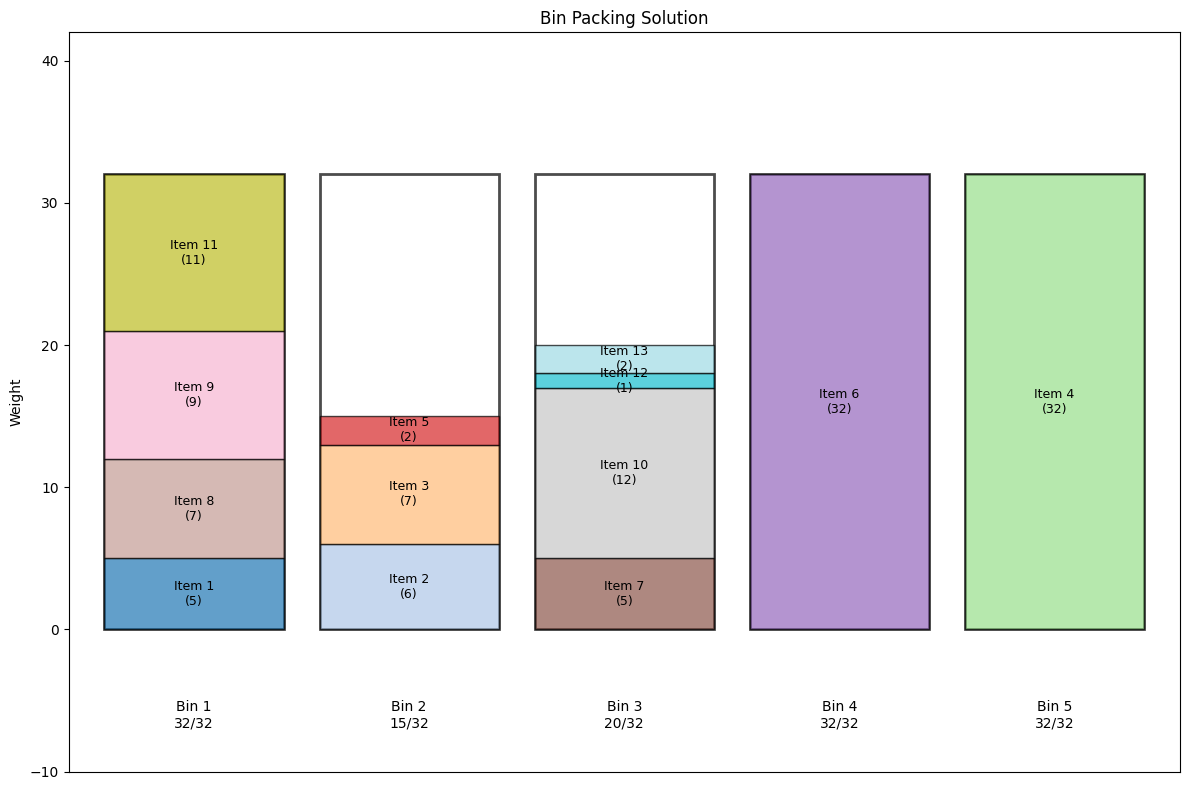

In [302]:


import pulp as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# -----------------------------------
# Type of problem
# -----------------------------------
model = pl.LpProblem("Bin_Packing", pl.LpMinimize)
     

# -----------------------------------
# Instance 
# -----------------------------------
n_items = 13
bin_capacity = 32

# Generate item weights (sizes)
# np.random.seed(13)
# item_weights = np.random.randint(20, 60, size=n_items)
item_weights = [5,6,7,32,2,32,5,7,9,12,11,1,2]


# Maximum number of bins needed (worst case: one item per bin)
max_bins = n_items

# -----------------------------------
# Decision variables 
# -----------------------------------
# Binary variable: whether to use bin j
y = {}
for j in range(max_bins):
    y[j] = pl.LpVariable(f"Use_Bin_{j}", cat='Binary')

# Binary variable: whether to put item i in bin j
x = {}
for i in range(n_items):
    for j in range(max_bins):
        x[(i, j)] = pl.LpVariable(f"Put_Item_{i}_In_Bin_{j}", cat='Binary')

# -----------------------------------
# Math model 
# -----------------------------------
# Objective function: minimize number of bins used
model += pl.lpSum([y[j] for j in range(max_bins)]), "Minimize_Bins"

# Constraints

# Each item must be in exactly one bin
for i in range(n_items):
    model += pl.lpSum([x[(i, j)] for j in range(max_bins)]) == 1, f"Item_{i}_Assignment"

# Bin capacity constraint
for j in range(max_bins):
    model += pl.lpSum([item_weights[i] * x[(i, j)] for i in range(n_items)]) <= bin_capacity * y[j], f"Bin_{j}_Capacity"

# Symmetry-breaking constraints to speed up solution
for j in range(1, max_bins):
    model += y[j] <= y[j-1], f"Symmetry_{j}"
     

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

print(f"Status: {pl.LpStatus[model.status]}")
print(f"Total bins needed: {pl.value(model.objective)}")

# Get the solution
bins_used = []
for j in range(max_bins):
    if y[j].value() > 0.5:
        items_in_bin = []
        bin_weight = 0
        for i in range(n_items):
            if x[(i, j)].value() > 0.5:
                items_in_bin.append((i, item_weights[i]))
                bin_weight += item_weights[i]
        bins_used.append((j, items_in_bin, bin_weight))

# Print the solution
print("\nBin Packing Solution:")
for j, items, weight in bins_used:
    print(f"Bin {j+1} (Total Weight: {weight}/{bin_capacity}):")
    for i, w in items:
        print(f"  - Item {i+1}: Weight {w}")

# -----------------------------------
# Graphical solution
# -----------------------------------
fig, ax = plt.subplots(figsize=(12, 8))

# Colors for items
colors = plt.cm.tab20(np.linspace(0, 1, n_items))

# Draw bins
bin_width = 1
bin_spacing = 0.2
bin_x_positions = np.arange(len(bins_used)) * (bin_width + bin_spacing)

for idx, (j, items, weight) in enumerate(bins_used):
    # Draw bin outline
    rect = patches.Rectangle(
        (bin_x_positions[idx], 0), bin_width, bin_capacity,
        linewidth=2, edgecolor='black', facecolor='none', alpha=0.7
    )
    ax.add_patch(rect)

    # Label bin
    ax.text(
        bin_x_positions[idx] + bin_width/2, -5,
        f"Bin {j+1}\n{weight}/{bin_capacity}",
        ha='center', va='top'
    )

    # Draw items in the bin
    current_height = 0
    for i, w in items:
        rect = patches.Rectangle(
            (bin_x_positions[idx], current_height), bin_width, w,
            linewidth=1, edgecolor='black', facecolor=colors[i], alpha=0.7
        )
        ax.add_patch(rect)

        # Item label
        ax.text(
            bin_x_positions[idx] + bin_width/2, current_height + w/2,
            f"Item {i+1}\n({w})",
            ha='center', va='center', fontsize=9
        )

        current_height += w

# Set plot limits
ax.set_xlim(-bin_spacing, max(bin_x_positions) + bin_width + bin_spacing)
ax.set_ylim(-10, bin_capacity + 10)

# Set ticks and labels
ax.set_xticks([])
ax.set_ylabel('Weight')
ax.set_title('Bin Packing Solution')

plt.tight_layout()
plt.show()
     


## <b>25.6 Google OR solution</b>

<div style="text-align:center">
<img src="img/googleor.jpg" width="100">
</div>

Still, 5 bins are used to pack all of the items.

In [303]:
from ortools.linear_solver import pywraplp

# -----------------------------------
# Instance 
# -----------------------------------
def create_data_model():
    """Create the data for the example."""
    data = {}
    weights = [5,6,7,32,2,32,5,7,9,12,11,1,2]
    data["weights"] = weights
    data["items"] = list(range(len(weights)))
    data["bins"] = data["items"]
    data["bin_capacity"] = 32
    return data



def main():
    data = create_data_model()

    # Create the mip solver with the SCIP backend.
    solver = pywraplp.Solver.CreateSolver("SCIP")

    if not solver:
        return
    # -----------------------------------
    # Decision variables
    # -----------------------------------
    # Variables
    # x[i, j] = 1 if item i is packed in bin j.
    x = {}
    for i in data["items"]:
        for j in data["bins"]:
            x[(i, j)] = solver.IntVar(0, 1, "x_%i_%i" % (i, j))

    # y[j] = 1 if bin j is used.
    y = {}
    for j in data["bins"]:
        y[j] = solver.IntVar(0, 1, "y[%i]" % j)
    # -----------------------------------
    # Math model 
    # -----------------------------------
    # Constraints
    # Each item must be in exactly one bin.
    for i in data["items"]:
        solver.Add(sum(x[i, j] for j in data["bins"]) == 1)

    # The amount packed in each bin cannot exceed its capacity.
    for j in data["bins"]:
        solver.Add(
            sum(x[(i, j)] * data["weights"][i] for i in data["items"])
            <= y[j] * data["bin_capacity"]
        )

    # Objective: minimize the number of bins used.
    solver.Minimize(solver.Sum([y[j] for j in data["bins"]]))

    # -----------------------------------
    # Solution
    # -----------------------------------
    print(f"Solving with {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0
        for j in data["bins"]:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data["items"]:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data["weights"][i]
                if bin_items:
                    num_bins += 1
                    print("Bin number", j)
                    print("  Items packed:", bin_items)
                    print("  Total weight:", bin_weight)
                    print()
        print()
        print("Number of bins used:", num_bins)
        print("Time = ", solver.WallTime(), " milliseconds")
    else:
        print("The problem does not have an optimal solution.")


if __name__ == "__main__":
    main()
 

Solving with SCIP 9.0.0 [LP solver: Glop 9.11]
Bin number 0
  Items packed: [0, 1, 2, 4, 6, 7]
  Total weight: 32

Bin number 1
  Items packed: [3]
  Total weight: 32

Bin number 2
  Items packed: [5]
  Total weight: 32

Bin number 3
  Items packed: [8, 9, 10]
  Total weight: 32

Bin number 4
  Items packed: [11, 12]
  Total weight: 3


Number of bins used: 5
Time =  19  milliseconds


## <b> 25.7 Wikipedia math model matching </b>

<b style="color:red;align=center">Ok, now, let's match it exactly to the Bin packing  wikipedia math model, I have modified all of the code found on the internet in chapter 25.4, to strictly match the wikipedia math model, so it's easier to go from one to another, and allows us to step up our level :</b>
$$
Min \thinspace  \sum_{j=1}^{n} y_{j} 
$$
$$
subject \thinspace to 
$$

$$
\sum_{j=1}^{n} s(i).x_{ij} <= B.y_{j}  \thinspace ∀ \thinspace j \in n
$$
$$
\sum_{j=1}^{n} x_{ij} =  \thinspace 1  \thinspace ∀ \thinspace i \in I
$$
$$
y_{j} \in \{0,1\}  \thinspace ∀ \thinspace j \in n
$$
$$
x_{ij} \in \{0,1\}  \thinspace ∀ \thinspace i \in I \thinspace ∀  \thinspace j \in n
$$

$$
where
$$

$$
 y_{j} = bin \thinspace j \thinspace being \thinspace used \thinspace or \thinspace not 
$$
$$
 x_{ij} = item \thinspace i \thinspace is \thinspace placed \thinspace in \thinspace the \thinspace j \thinspace bin   
$$

$$
 I = set \thinspace of \thinspace items
$$
$$
 B = j \thinspace bin \thinspace capacity 
$$
$$
 K = number \thinspace of \thinspace used \thinspace bins
$$
$$
 n = set \thinspace of  \thinspace bins
$$
$$
 s(i)= item \thinspace i \thinspace weight  
$$

Link :  https://en.wikipedia.org/wiki/Bin_packing_problem


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [304]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance 
# -----------------------------------
# Set of bins
n = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32] 
# Set of items
I = ['1','2','3','4','5','6','7','8','9','10','11','12','13']
# Set of items weight
s = [5,6,7,32,2,32,5,7,9,12,11,1,2]
# Max available weight per bin
B = 32
# Amount of items
item_count = len(I)

# -----------------------------------
# Decision variables
# -----------------------------------
# y are used or not bins decisions variables
y = pulp.LpVariable.dicts('BinUsed', n,cat="Binary")

# Let's first envisage all of the ItemInBin possibilities
possible_ItemInBin = [(i, j)  for i in I for j in n]

# Each of the 439 ItemInBin possibilities then becomes xij type of decisions variables
x = pulp.LpVariable.dicts('itemInBin', possible_ItemInBin,cat="Binary")

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Bin_Packing_Problem", LpMinimize)

# -----------------------------------
# Math model
# -----------------------------------
# Add the objective function.
prob += lpSum([y[j] for j in n]), "Minimize_Bins_Used" # Looks EXACTLY like the wikipedia math model

# Constraints

# 1. For each bin, the number of items in the bin cannot exceed the capacity of the bin
for j in n: # Looks like the wikipedia maths model !
    prob += lpSum([s[i] * x[(I[i], j)] for i in range(item_count)]) <= B*y[j]
# Note : x[(I[j], i) is one of the 439 decision variables.

# 2. An item can only be in a single bin
for i in I: # Looks like the wikipedia maths model !
    prob += lpSum([x[(i, j)] for j in n]) == 1 # Looks EXACTLY like the wikipedia maths model !


# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

# The bins used
print("Bins used: " + str(sum(([y[i].value() for i in n]))))

# Improve the aspect of the results.
bins = {}
for itemBinPair in x.keys():
    if(x[itemBinPair].value() == 1):
        itemNum = itemBinPair[0]
        binNum = itemBinPair[1]
        if binNum in bins:
            bins[binNum].append(itemNum)
        else:
            bins[binNum] = [itemNum]

for b in bins.keys():
    print(str(b) + ": " + str(bins[b]))

Bins used: 5.0
0: ['1', '2', '5', '7', '9', '12', '13']
10: ['3', '8']
6: ['4']
11: ['6']
1: ['10', '11']


Ok, let's now reduce our bin packing instance with only 3 bins and 6 items, and hard code instead of math compact model, for a better understanding.

In [305]:
# Coming soon

# <b> 26 Traveling salesman </b>

<div style="text-align:center">
<img src="img/tvs.webp" width="500"/>
</div>

## <b> 26.1 Abstract</b>

Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?


<div style="text-align:center">
<img src="img/Illustration_of_an_unsolved_travelling_salesman_problem.svg.png" width="300"/>
</div>

The travelling salesman problem seeks to find the shortest possible loop that connects every red dot.

Link : https://en.wikipedia.org/wiki/Travelling_salesman_problem

## <b> 26.2 Instance</b>

Let's do a cities distances  matrix.
 <table align="center">
  <tr>
    <th><b>City</b></th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
  </tr>
    <tr>
    <td><b>0</b></td>
    <th>0.0</th>
    <th>5.0</th>
    <th>3.8</th>
    <th>2.2</th>
    <th>2.4</th>
  </tr>
  <tr>
    <td><b>1</b></td>
    <th>5.0</th>
    <th>0.0</th>
    <th>2.6</th>
    <th>3.1</th>
    <th>5.1</th>
  </tr>
    <tr>
    <td><b>2</b></td>
    <th>3.8</th>
    <th>2.6</th>
    <th>0.0</th>
    <th>1.6</th>
    <th>2.8</th>
  </tr>
    <tr>
     <td><b>3</b></td>
    <th>2.2</th>
    <th>3.1</th>
    <th>1.6</th>
    <th>0.0</th>
    <th>2.3</th>
  </tr>
      <tr>
     <td><b>4</b></td>
    <th>2.4</th>
    <th>5.1</th>
    <th>2.8</th>
    <th>2.3</th>
    <th>0.0</th>
  </tr>
</table> 
<br>


## <b> 26.3 Math model</b>

$$
Min \thinspace  \sum_{i=1}^{n} \sum_{i \neq j, j=1}^{n} c_{ij} x_{ij} 
$$
$$
subject \thinspace to 
$$

$$
\sum_{i \neq j, i=1}^{n} x_{ij}  = 1  \thinspace ∀ \thinspace j \in n
$$
$$
\sum_{i \neq j, j=1}^{n} x_{ij}  = 1  \thinspace ∀ \thinspace i \in n
$$

$$
x_{ij} \in \{0,1\}  \thinspace ∀ \thinspace i \in n \thinspace ∀  \thinspace j \in n
$$

$$
c_{ij} \in N  \thinspace ∀ \thinspace i \in n \thinspace ∀  \thinspace j \in n
$$

$$
where
$$


$$
 x_{ij} = The \thinspace path \thinspace goes \thinspace from \thinspace city \thinspace i \thinspace to \thinspace city \thinspace j  
$$

$$
 c_{ij} = Cost or distance \thinspace from \thinspace city \thinspace i \thinspace to \thinspace city \thinspace j  
$$

$$
 n = set \thinspace of \thinspace cities
$$


Warning : I need to add an additional "Prevent Subtour " constraint to this math model . 


## <b> 26.3 Python Pulp solution</b>

Testing the medium.com Bernardo Puppim code, then, as always, I will make it match the wikipedia math model.

Link : https://medium.com/@bpuppim/solving-the-traveling-salesman-problem-using-pulp-f2f1aaf179fd

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [306]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance 
# -----------------------------------
# Nodes
departure  = ['0','1', '2', '3', '4']
arrival    = ['0','1', '2', '3', '4']

# Map
distance = {   
            '0': { '0': 0.0, '1': 5.0 ,'2': 3.8, '3': 2.2 ,'4': 2.4 },
            '1': { '0': 5.0, '1': 0.0 ,'2': 2.6, '3': 3.1 ,'4': 5.1 }, 
            '2': { '0': 3.8, '1': 2.6 ,'2': 0.0, '3': 1.6 ,'4': 2.8 }, 
            '3': { '0': 2.2, '1': 3.1 ,'2': 1.6, '3': 0.0 ,'4': 2.3 }, 
            '4': { '0': 2.4, '1': 5.1 ,'2': 2.8, '3': 2.3 ,'4': 0.0 } 
}

# -----------------------------------
# Type of problem
# -----------------------------------
lp_problem = LpProblem("Traveling_Salesman_Problem", LpMinimize)

# -----------------------------------
# Xij decision variables creation
# -----------------------------------
# All of the possibles routes between departure and arrivals
# As soon as an xij variable is involved, this coding strategy is used to model all of the possibilities.
# Bernardo Puppim code is SO GREAT AND CLEAR 
routes = [ (d, a) for d in departure for a in arrival ]

# Thus, they becomes decisions variables
vars = LpVariable.dicts("best route", (departure, arrival), 0, 1, LpInteger)

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
lp_problem += (
    lpSum([vars[o][d] * distance[o][d] for (o, d) in routes]),"Minimize_total_distance", )

# Constraints of the problem
# These ensure that each destination and source is visited exactly once 
# and that no node is visited twice (excluding the starting node)
for a in arrival:
    lp_problem += (
            lpSum([vars[d][a] for d in departure]) == 1,f"Sum_Arrival_{a}",)

for d in departure:
    lp_problem += (
            lpSum([vars[d][a] for a in arrival]) == 1,f"Sum_departure_{d}",)

lp_problem += (
        lpSum([vars[a][a] for a in arrival]) == 0,f"Sum_{a,a}",
)

# -----------------------------------
# Solution
# -----------------------------------
lp_problem.solve()

print("Status:", LpStatus[lp_problem.status])

for v in lp_problem.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

print("Total distance = ", value(lp_problem.objective))

Status: Optimal
best_route_0_3 = 1.0
best_route_1_2 = 1.0
best_route_2_1 = 1.0
best_route_3_4 = 1.0
best_route_4_0 = 1.0
Total distance =  12.1


The precedent solution is wrong cause "subtour elimination" is missing,
Adding Bernardo Puppim subtour elimination code: 

In [307]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance 
# -----------------------------------
# Nodes
departure  = ['0','1', '2', '3', '4']
arrival    = ['0','1', '2', '3', '4']

# Map
distance = {   
            '0': { '0': 0.0, '1': 5.0 ,'2': 3.8, '3': 2.2 ,'4': 2.4 },
            '1': { '0': 5.0, '1': 0.0 ,'2': 2.6, '3': 3.1 ,'4': 5.1 }, 
            '2': { '0': 3.8, '1': 2.6 ,'2': 0.0, '3': 1.6 ,'4': 2.8 }, 
            '3': { '0': 2.2, '1': 3.1 ,'2': 1.6, '3': 0.0 ,'4': 2.3 }, 
            '4': { '0': 2.4, '1': 5.1 ,'2': 2.8, '3': 2.3 ,'4': 0.0 } 
}

# -----------------------------------
# Type of problem
# -----------------------------------
lp_problem = LpProblem("Traveling_Salesman_Problem", LpMinimize)

# -----------------------------------
# Decision variables 
# -----------------------------------

# -----------------------------------
# Xij decision variables creation
# -----------------------------------
# All of the possibles routes between departure and arrivals
# As soon as an xij variable is involved, this coding strategy is used to model all of the possibilities.
# Bernardo Puppim code is SO GREAT AND CLEAR 
routes = [ (d, a) for d in departure for a in arrival ]

# Thus, they becomes decisions variables
vars = LpVariable.dicts("best route", (departure, arrival), 0, 1, LpInteger)

# -----------------------------------
# Subtour elimination decision variables creation
# -----------------------------------
vars_f = LpVariable.dicts('Flow', (departure, arrival), 0, None, LpInteger) 
n = len(departure)-1

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
lp_problem += (
    lpSum([vars[o][d] * distance[o][d] for (o, d) in routes]),"Minimize_total_distance", )

# Constraints of the problem
for a in arrival:
    lp_problem += (
            lpSum([vars[d][a] for d in departure]) == 1,f"Sum_Arrival_{a}",)

for d in departure:
    lp_problem += (
            lpSum([vars[d][a] for a in arrival]) == 1,f"Sum_departure_{d}",)

lp_problem += (
        lpSum([vars[a][a] for a in arrival]) == 0,f"Sum_{a,a}",
)

# Subtour elimination constraints 

for d in departure:
        for a in arrival:
                lp_problem += (
                        vars_f[d][a] <= n*vars[d][a]
                        )
for o in ['1','2','3','4']: # non-starting cities
        lp_problem += (
                lpSum([vars_f[a][o]-vars_f[o][a] for a in arrival]) == 1,f"Flow_balance_{o}",
                )
        
# -----------------------------------
# Solution
# -----------------------------------
lp_problem.solve()

print("Status:", LpStatus[lp_problem.status])

for v in lp_problem.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

print("Minimized distance = ", value(lp_problem.objective))

Status: Optimal
Flow_0_3 = 4.0
Flow_1_2 = 2.0
Flow_2_4 = 1.0
Flow_3_1 = 3.0
best_route_0_3 = 1.0
best_route_1_2 = 1.0
best_route_2_4 = 1.0
best_route_3_1 = 1.0
best_route_4_0 = 1.0
Minimized distance =  13.100000000000001


Let's try out another tsp code, using the same instance :

Link :https://www.kaggle.com/code/itoeiji/solving-tsp-and-vrp-by-mip-using-pulp

Let's observe the distance matrix, with variant colors corresponding to the distances, the darker the better :

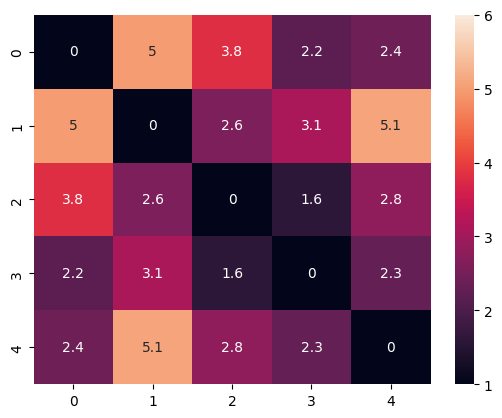

In [308]:
# get distance matrix

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = [[0.0 , 5.0,  3.8, 2.2, 2.4],
            [5.0, 0.0, 2.6, 3.1, 5.1],
            [3.8, 2.6, 0.0, 1.6, 2.8],
            [2.2, 3.1, 1.6, 0.0, 2.3],
            [2.4, 5.1, 2.8, 2.3, 0.0]]


sns.heatmap(data, vmin=1, vmax=6, annot=True,)
plt.show()

In [309]:
# -----------------------------------
# Instance
# -----------------------------------
n_customer = 4
n_point = n_customer + 1

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem('tsp_mip', LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
# we need to keep track of the order in the tour to eliminate the possibility of subtours
u = LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------
# set objective function
problem += lpSum(data[i][j] * x[i, j] for i in range(n_point) for j in range(n_point))

# set constraints
for i in range(n_point):
    problem += x[i, i] == 0

for i in range(n_point):
    problem += lpSum(x[i, j] for j in range(n_point)) == 1
    problem += lpSum(x[j, i] for j in range(n_point)) == 1

# eliminate subtour
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1

# -----------------------------------
# Solution
# -----------------------------------           
# solve problem
status = problem.solve()

# output status, value of objective function
status, LpStatus[status], value(problem.objective)

for v in lp_problem.variables():
    if v.varValue > 0:
        print(v.name, "=", v.varValue)

print( "Minimized distance : ",value(problem.objective))

Flow_0_3 = 4.0
Flow_1_2 = 2.0
Flow_2_4 = 1.0
Flow_3_1 = 3.0
best_route_0_3 = 1.0
best_route_1_2 = 1.0
best_route_2_4 = 1.0
best_route_3_1 = 1.0
best_route_4_0 = 1.0
Minimized distance :  13.100000000000001


Let's draw solution using networkX:

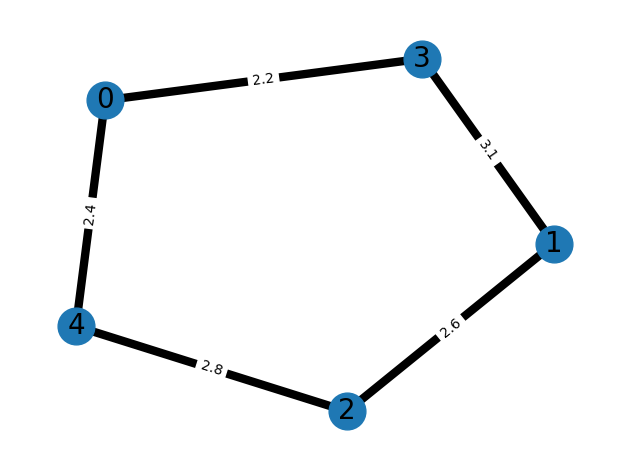

In [310]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("0", "3", weight=2.2)
G.add_edge("1", "2", weight=2.6)
G.add_edge("2", "4", weight=2.8)
G.add_edge("3", "1", weight=3.1)
G.add_edge("4", "0", weight=2.4)


elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

# <b> 27.  Modeling a vehicule routing problem  </b>

<div style="text-align:center">
<img src="img/vrp.png" width="500"/>
</div>

## <b> 27.1 Abstract </b>
It is a question of determining the tours of a fleet of vehicles in order to deliver a list of customers, or to carry out intervention tours (maintenance, repair, controls) or visits (medical, commercial visits, etc.).The goal is to minimize the delivery cost of goods.This problem is a classic extension of the commercial traveler problem, and is part of the class of NP-Complet problems.

Compared to TSP, the new data elements are as follows:

Requests:  Each establishment has a <b>demand</b> corresponding to the quantity, (for example, the weight or the volume) of the item to be removed.

Capacities: (CVRP) Each vehicle has a capacity, that is to say the maximum quantity that the vehicle can hold.During the journey of a vehicle, the total quantity the objects it transports can never exceed its capacity.

Others variants : Vehicle Routing Problem with 
Time Windows (VRPTW), Vehicle Routing Problem with Pick-Up and Delivery (VRPPD) 
and Capacitated Vehicle Routing Problem (CVRP)

## <b> 27.2 Math model </b>

$$
Min \thinspace  \sum_{i \in V} \sum_{j \in V} c_{ij} x_{ij} 
$$
$$
subject \thinspace to 
$$

$$
\sum_{i \in V} x_{ij}   = 1  \thinspace ∀ \thinspace j \in V 
$$
$$
\sum_{j \in V} x_{ij}   = 1  \thinspace ∀ \thinspace i \in V 
$$

$$
\sum_{i \in V } x_{i0}   = K  
$$

$$
\sum_{j \in V } x_{0j}   = K 
$$

$$
\sum_{i \notin S } \sum_{j \in S } x_{ij}   >= r (S),  ∀ S \subseteq V \ 0 , S 	\neq 0
$$

$$
x_{ij} \in \{0,1\}  \thinspace ∀ \thinspace i \in V \thinspace ∀  \thinspace j \in V
$$



$$
where
$$


$$
 x_{ij} = The \thinspace path \thinspace goes \thinspace from \thinspace city \thinspace i \thinspace to \thinspace city \thinspace j  
$$

$$
 c_{ij} = Cost/distance \thinspace from \thinspace city \thinspace i \thinspace to \thinspace city \thinspace j  
$$

$$
K = number \thinspace of \thinspace available \thinspace vehicules
$$

$$
r ( S ) =    corresponds \thinspace to \thinspace the \thinspace minimum \thinspace number \thinspace of \thinspace vehicles \thinspace needed \thinspace to \thinspace serve \thinspace set \thinspace S 
$$

$$
0 = depot \thinspace node
$$



Note : demand is missing ... please wait

## <b> 27.3 Instance </b>

Comin' soon

## <b> 27.4 Kaggle Eiji Ito Code </b>

Please wait, first I am testing some codes found on the internet, then I will try to make them matching the math model variables names etc ...

In [311]:
import itertools

import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import pulp

import warnings
warnings.filterwarnings("ignore")

# define VRP

n_customer = 9
n_point = n_customer + 1
vehicle_capacity = 8

df = pd.DataFrame({
    'x': np.random.randint(0, 100, n_point),
    'y': np.random.randint(0, 100, n_point),
    'demand': np.random.randint(1, 5, n_point),
})

df.iloc[0]['x'] = 0
df.iloc[0]['y'] = 0
df.iloc[0]['demand'] = 0

df




,x,y,demand
0,0,0,0
1,54,24,2
2,43,33,3
3,54,76,4
4,17,21,4
5,33,75,2
6,29,56,3
7,0,60,4
8,72,62,3
9,41,11,2


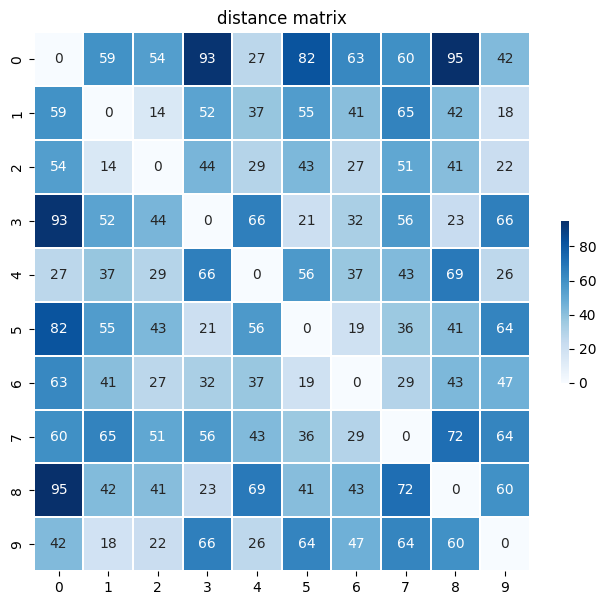

In [312]:


# get distance matrix

distances = pd.DataFrame(distance_matrix(df[['x', 'y']].values, df[['x', 'y']].values), index=df.index, columns=df.index).values

fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(distances, ax=ax, cmap='Blues', annot=True, fmt='.0f', cbar=True, cbar_kws={"shrink": .3}, linewidths=.1)
plt.title('distance matrix')
plt.show()



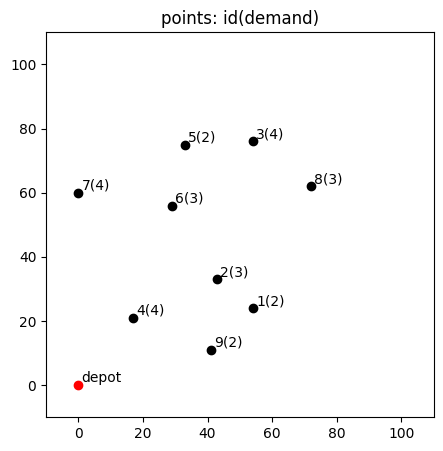

In [313]:
plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        demand = row['demand']
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}({demand})')
        
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('points: id(demand)')
plt.show()

In [314]:
%%time

demands = df['demand'].values

# set problem
problem = pulp.LpProblem('cvrp_mip', pulp.LpMinimize)

# set variables
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary')
n_vehicle = pulp.LpVariable('n_vehicle', lowBound=0, upBound=100, cat='Integer')

# set objective function
problem += pulp.lpSum([distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point)])

# set constrains
for i in range(n_point):
    problem += x[i, i] == 0
    
for i in range(1, n_point):
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1
        
problem += pulp.lpSum(x[i, 0] for i in range(n_point)) == n_vehicle
problem += pulp.lpSum(x[0, i] for i in range(n_point)) == n_vehicle

# eliminate subtour
subtours = []
for length in range(2, n_point):
     subtours += itertools.combinations(range(1, n_point), length)

for st in subtours:
    demand = np.sum([demands[s] for s in st])
    arcs = [x[i, j] for i, j in itertools.permutations(st, 2)]
    problem += pulp.lpSum(arcs) <= np.max([0, len(st) - np.ceil(demand / vehicle_capacity)])

# solve problem
status = problem.solve()

# output status, value of objective function
status, pulp.LpStatus[status], pulp.value(problem.objective)

pulp.value(n_vehicle)

CPU times: total: 46.9 ms
Wall time: 867 ms


4.0

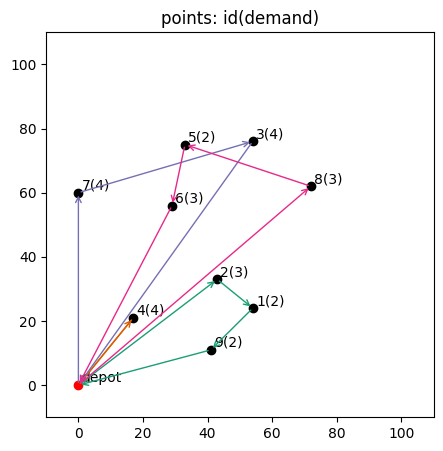

In [315]:


# check TSP problem and optimized route

plt.figure(figsize=(5, 5))

# draw problem state
for i, row in df.iterrows():
    if i == 0:
        plt.scatter(row['x'], row['y'], c='r')
        plt.text(row['x'] + 1, row['y'] + 1, 'depot')
    else:
        plt.scatter(row['x'], row['y'], c='black')
        demand = row['demand']
        plt.text(row['x'] + 1, row['y'] + 1, f'{i}({demand})')
        
plt.xlim([-10, 110])
plt.ylim([-10, 110])
plt.title('points: id(demand)')

# draw optimal route
cmap = matplotlib.cm.get_cmap('Dark2')
routes = [(i, j) for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1]

for v in range(int(pulp.value(n_vehicle))):
    
    # identify the route of each vehicle
    vehicle_route = [routes[v]]
    while vehicle_route[-1][1] != 0:
        for p in routes:
            if p[0] == vehicle_route[-1][1]:
                vehicle_route.append(p)
                break

    # draw for each vehicle
    arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor=cmap(v))
    for i, j in vehicle_route:
        plt.annotate('', xy=[df.iloc[j]['x'], df.iloc[j]['y']], xytext=[df.iloc[i]['x'], df.iloc[i]['y']], arrowprops=arrowprops)
                
plt.show()



## <b> 27.4 Google OR CVRP Code </b>


Please wait google or CVRP code test

In [316]:
"""Capacited Vehicles Routing Problem (CVRP)."""

from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp


def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = [
        # fmt: off
      [0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354, 468, 776, 662],
      [548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674, 1016, 868, 1210],
      [776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164, 1130, 788, 1552, 754],
      [696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822, 1164, 560, 1358],
      [582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708, 1050, 674, 1244],
      [274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628, 514, 1050, 708],
      [502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856, 514, 1278, 480],
      [194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320, 662, 742, 856],
      [308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662, 320, 1084, 514],
      [194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388, 274, 810, 468],
      [536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764, 730, 388, 1152, 354],
      [502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114, 308, 650, 274, 844],
      [388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194, 536, 388, 730],
      [354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0, 342, 422, 536],
      [468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536, 342, 0, 764, 194],
      [776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274, 388, 422, 764, 0, 798],
      [662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730, 536, 194, 798, 0],
        # fmt: on
    ]
    data["demands"] = [0, 1, 1, 2, 4, 2, 4, 8, 8, 1, 2, 1, 2, 4, 4, 8, 8]
    data["vehicle_capacities"] = [15, 15, 15, 15]
    data["num_vehicles"] = 4
    data["depot"] = 0
    return data


def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    total_distance = 0
    total_load = 0
    for vehicle_id in range(data["num_vehicles"]):
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        route_load = 0
        while not routing.IsEnd(index):
            node_index = manager.IndexToNode(index)
            route_load += data["demands"][node_index]
            plan_output += f" {node_index} Load({route_load}) -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f" {manager.IndexToNode(index)} Load({route_load})\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        plan_output += f"Load of the route: {route_load}\n"
        print(plan_output)
        total_distance += route_distance
        total_load += route_load
    print(f"Total distance of all routes: {total_distance}m")
    print(f"Total load of all routes: {total_load}")


def main():
    """Solve the CVRP problem."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Capacity constraint.
    def demand_callback(from_index):
        """Returns the demand of the node."""
        # Convert from routing variable Index to demands NodeIndex.
        from_node = manager.IndexToNode(from_index)
        return data["demands"][from_node]

    demand_callback_index = routing.RegisterUnaryTransitCallback(demand_callback)
    routing.AddDimensionWithVehicleCapacity(
        demand_callback_index,
        0,  # null capacity slack
        data["vehicle_capacities"],  # vehicle maximum capacities
        True,  # start cumul to zero
        "Capacity",
    )

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_parameters.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_parameters.time_limit.FromSeconds(1)

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)


if __name__ == "__main__":
    main()

Objective: 6208
Route for vehicle 0:
 0 Load(0) ->  4 Load(4) ->  3 Load(6) ->  1 Load(7) ->  7 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 1:
 0 Load(0) ->  14 Load(4) ->  16 Load(12) ->  10 Load(14) ->  9 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 2:
 0 Load(0) ->  12 Load(2) ->  11 Load(3) ->  15 Load(11) ->  13 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Route for vehicle 3:
 0 Load(0) ->  8 Load(8) ->  2 Load(9) ->  6 Load(13) ->  5 Load(15) ->  0 Load(15)
Distance of the route: 1552m
Load of the route: 15

Total distance of all routes: 6208m
Total load of all routes: 60



# <b>27.  Modeling a shortest path problem  </b>

## <b>27.1 Abstract </b>


https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html

## <b>27.2 Instance </b>

<div style="text-align:center">
<img src="img/sp.png" width="500"/>
</div>

## <b>27.3 Math model </b>

## <b>27.4 NetworkX Djikstra Solution </b>




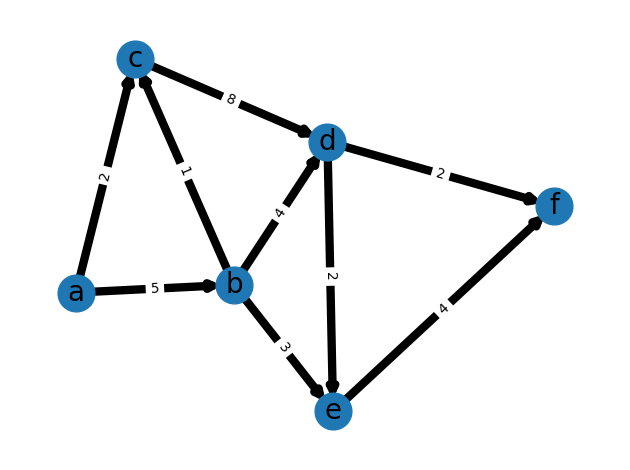

In [317]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

G.add_edge("a", "b", weight=5,pos=(1,1))
G.add_edge("a", "c", weight=2)
G.add_edge("b", "c", weight=1,pos=(1,2))
G.add_edge("b", "d", weight=4)
G.add_edge("b", "e", weight=3)
G.add_edge("c", "d", weight=8)
G.add_edge("d", "e", weight=2)
G.add_edge("d", "f", weight=2)
G.add_edge("e", "f", weight=4)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [318]:
print("Path to follow")
nx.dijkstra_path(G, "a", "f")

Path to follow


['a', 'b', 'd', 'f']

## <b>27.5 Python Pulp Solution </b>